In [2]:
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import kgeo
import tools as tls
import subprocess
import scipy.interpolate
from matplotlib import ticker
%load_ext autoreload
%autoreload 2
import importlib 


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Welcome to eht-imaging! v 1.2.5 



# Computation of the lensing bands

In [3]:
%time !python3 lensingbands.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
^C
Traceback (most recent call last):
  File "/home/tej/Desktop/Code_Stuff/Repositories/aart/lensingbands.py", line 5, in <module>
    lb.lb()
  File "/home/tej/Desktop/Code_Stuff/Repositories/aart/aart_func/lb_f.py", line 293, in lb
    hull_0i, hull_0e, hull_1i, hull_1e, hull_2i, hull_2e = hulls(alpha_critc,beta_critc)
                                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tej/Desktop/Code_Stuff/Repositories/aart/aart_func/lb_f.py", line 257, in hulls
    m1=optimize.root(ApparentBH, limi0, args=(spin_case,thetao,data[0][i],data[1][i],0,-1,D_obs))
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tej/anaconda3/envs/aymig/lib/python3.11/site-packages/scipy/optimize/_root.py", li

## Reading the output of the lensing bands calculation

In [3]:
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5


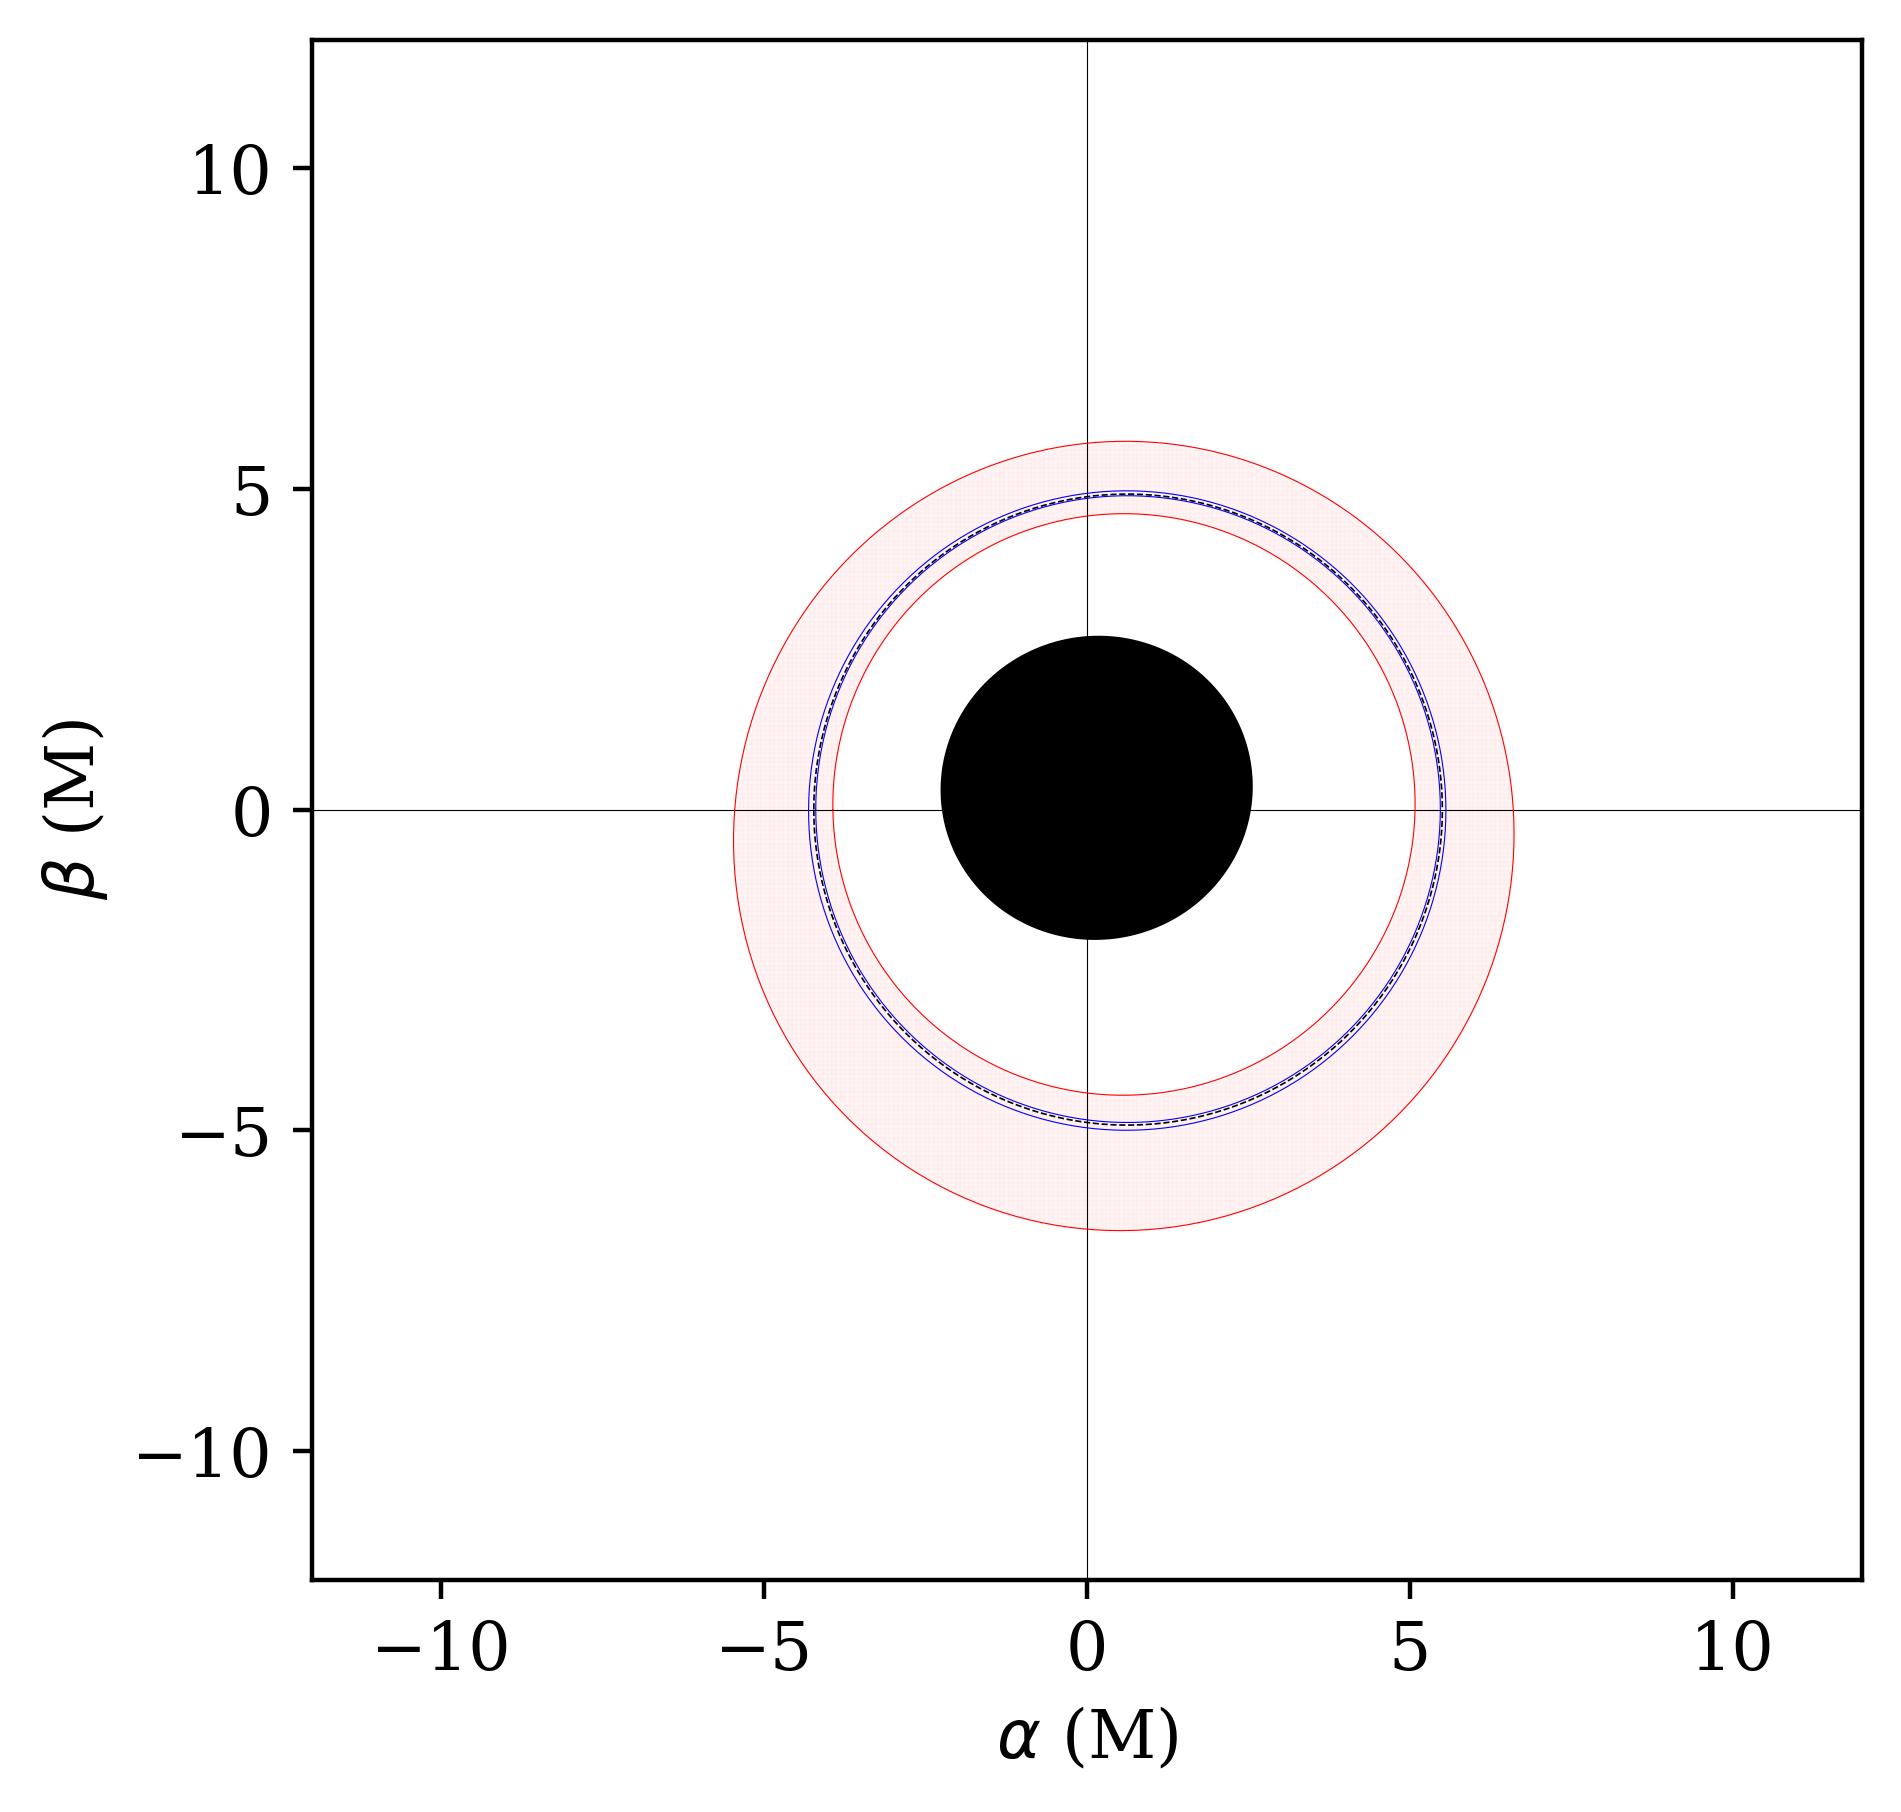

In [10]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
ax.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
ax.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)

#Plotting the grid points of the n=1 lensing band
ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.00001,alpha=0.5)

ax.set_xlim(-12,12)
ax.set_ylim(-12,12)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('LB.png',dpi=400,bbox_inches='tight')

plt.show()

# Analytical Ray-tracing

In [4]:
%time !python3 raytracing.py



Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Analytical ray-tracing of the n=0 band points
^C
CPU times: user 219 ms, sys: 32.3 ms, total: 251 ms
Wall time: 10.9 s


### Reading the output of the ray-tracing

In [3]:
fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]

h5f.close()

Reading file:  ./Results/Rays_a_0.94_i_17.h5


## Plotting the $r$ and $\phi$ values of the n=0 band

In [ ]:
print(lim0)

In [ ]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)
        
CSphi=ax.contourf(phi0.reshape(N0,N0).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim0,lim0,-lim0,lim0],origin="lower")
CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('Rays.png',dpi=400,bbox_inches='tight')

# Computing images

In [18]:

args = ' '
cmd_args = [
   	'--nu ',
	'--mass ',
	'--scaleh ',
	'--thetab ',
	'--beta ',
    '--Rie ',
    '--Bchoi ',
	'--rb0 ',
	'--nth0 ',
	'--te0 ',
	'--pdens ',
	'--ptemp ' 
]
# brightparams = [
# 	230e9, # nu0
# 	(MMkg * u.kg).to(u.g).value, # mass
# 	.5, # scale_height
# 	50.0 * (np.pi / 180), # theta_b
# 	1.0, # beta
# 	10.0, # Rie
# 	0, # Bchoice
# 	2, # rb
# 	1.0726e+05, # n_th0
# 	1.2428e+11, # t_e0
# 	-.7, # p_dens
# 	-.84 # p_temp
# ]
brightparams = [
	230e9, # nu0
	(MMkg * u.kg).to(u.g).value, # mass
	.5, # scale_height
	50.0 * (np.pi / 180), # theta_b
	1.0, # beta
	10.0, # Rie
	0, # Bchoice
	2, # rb
	1e5, # n_th0
	1e11, # t_e0
	-.7, # p_dens
	-.84 # p_temp
]



for i in range(len(brightparams)):
    args = args + cmd_args[i] + str(brightparams[i]) + ' '
aartpath = '/home/tej/Desktop/Code_Stuff/Repositories/aart'

In [19]:
subprocess.run(['python3 ' + aartpath + '/radialintensity.py' + args], shell=True)


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Intensity
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
File  ./Results/Intensity_a_0.94_i_17_nu_2.3e+11_mass_1.3e+43_scaleh_0.5_thetab_8.727e-01_beta_1.0_Rie_10.0_Bchoi_0.0_rb_2.0_nth0_1.0e+05_te0_1.0e+11_pdens_-0.7_ptemp_-0.84.h5  created.


CompletedProcess(args=['python3 /home/tej/Desktop/Code_Stuff/Repositories/aart/radialintensity.py --nu 230000000000.0 --mass 1.3249659172847406e+43 --scaleh 0.5 --thetab 0.8726646259971648 --beta 1.0 --Rie 10.0 --Bchoi 0 --rb0 2 --nth0 100000.0 --te0 100000000000.0 --pdens -0.7 --ptemp -0.84 '], returncode=0)

In [20]:
fnrays='./Results/Intensity_a_{}_i_{}_nu_{}_mass_{}_scaleh_{}_thetab_{}_beta_{}_Rie_{}_Bchoi_{}_rb_{}_nth0_{}_te0_{}_pdens_{}_ptemp_{}.h5'.format(
    spin_case,
    i_case,
    "{:.1e}".format(brightparams[0]),
    "{:.1e}".format(brightparams[1]), 
    float(brightparams[2]),
    "{:.3e}".format(brightparams[3]), 
    float(brightparams[4]),
    float(brightparams[5]), 
    float(brightparams[6]),
    float(brightparams[7]),
    "{:.1e}".format(brightparams[8]),
    "{:.1e}".format(brightparams[9]),
    float(brightparams[10]),
    float(brightparams[11]))
print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]

h5f.close()

#Intensity_a_0.94_i_17_nu_2.3e+11_mass_1.3e+43_scaleh_0.5_thetab_1.047e+00_beta_1.0_Rie_10.0_Bchoi_0.0_rb_50.0_nth0_1.2e+04_te0_8.1e+09_pdens_-0.7_ptemp_-0.84
#Intensity_a_0.94_i_17_nu_2.3e+11_mass_1.3e+43_scaleh_0.5_thetab_1.047e+00_beta_1.0_Rie_10_Bchoi_0_rb_50.0_nth0_1.2e+04_te0_8.1e+09_pdens_-0.7_ptemp_-0.84

Reading file:  ./Results/Intensity_a_0.94_i_17_nu_2.3e+11_mass_1.3e+43_scaleh_0.5_thetab_8.727e-01_beta_1.0_Rie_10.0_Bchoi_0.0_rb_2.0_nth0_1.0e+05_te0_1.0e+11_pdens_-0.7_ptemp_-0.84.h5


In [44]:

def curve_params(varphi, rho):
    """calculate Appendix B parameters for a curve rho(varphi)
       assume varphis are equally spaced!!!"""
          
    # spacing in varphi  
    dvarphi = varphi[-1]-varphi[-2]
    
    # area
    area = np.trapz(0.5*rho**2,dx=dvarphi)
    
    # centroid
    mux = np.trapz((rho**3*np.cos(varphi)) / (3*area), dx=dvarphi)
    muy = np.trapz((rho**3*np.sin(varphi)) / (3*area), dx=dvarphi)  

    # second moment
    Sxx = np.trapz((rho**4*np.cos(varphi)**2) / (4*area), dx=dvarphi) - mux**2
    Syy = np.trapz((rho**4*np.sin(varphi)**2) / (4*area), dx=dvarphi) - muy**2
    Sxy = np.trapz((rho**4*np.sin(varphi)*np.cos(varphi)) / (4*area), dx=dvarphi) - mux*muy
    
    # diagonalize 2nd moment matrix
    D = np.sqrt((Sxx-Syy)**2 + 4*Sxy*Sxy)
    a = np.sqrt(2*(Sxx + Syy + D))
    b = np.sqrt(2*(Sxx + Syy - D))
    
    #radius, eccentricity, position angle
    r = np.sqrt(0.5*(a**2 + b**2))
    e = np.sqrt(1-b**2/a**2)
    chi = 0.5*np.arcsin(2*Sxy/D)
    
    return (area, mux, muy, r, e, chi)    
    

In [45]:
a = spin_case       
inc = i_case*np.pi/180. # inclination angle
rh = 1 + np.sqrt(1-a**2) # event horizon

print("spin %0.2f, inclination %0.2f, horizon %0.2f\n"%(a,inc*180/np.pi,rh))
print("computing curves....\n")
# angles to sample
varphis = np.linspace(-180,179,360)*np.pi/180


# generate inner shadow (n=0) curve with kgeo
data_inner = kgeo.equatorial_lensing.rho_of_req(a,inc,rh,mbar=0,varphis=varphis)
(_, rhos_inner, alphas_inner, betas_inner) = data_inner

# generate outer shadow (n=inf) curve with kgeo
data_outer = kgeo.equatorial_lensing.rho_of_req(a,inc,rh,mbar=5,varphis=varphis)
(_, rhos_outer, alphas_outer, betas_outer) = data_outer

spin 0.94, inclination 17.00, horizon 1.34

computing curves....



In [20]:
# compute curve parameters
(area_inner, mux_inner, muy_inner, r_inner, e_inner, chi_inner) = curve_params(varphis,rhos_inner)
(area_outer, mux_outer, muy_outer, r_outer, e_outer, chi_outer) = curve_params(varphis,rhos_outer)

print("inner shadow")
print("===========================")
print("area: %0.2f"%area_inner)
print("centroid: %0.2f, %0.2f"%(mux_inner, muy_inner))
print("radius: %0.2f"%r_inner)
print("eccentricity: %0.2f"%e_inner)
print("position angle: %0.2f"%(chi_inner*180/np.pi))  

print("\n outer shadow")
print("===========================")
print("area: %0.2f"%area_outer)
print("centroid: %0.2f, %0.2f"%(mux_outer, muy_outer))
print("radius: %0.2f"%r_outer)
print("eccentricity: %0.2f"%e_outer)
print("position angle: %0.2f"%(chi_outer*180/np.pi))  

print("===========================")
thetatotal = 100
varphi = np.arange( 2 * np.pi + 1, step=(2*np.pi + 1)/thetatotal)
rho = tls.radii_of_theta(I0, thetatotal)
(area, mux, muy, r, e, chi) = curve_params(varphi, rho)
print('r = ' + str(r))
print('e = ' + str(e))
print('centroid =  ({}, {})'.format(mux, muy))
print('area =  {}'.format(area))

NameError: name 'curve_params' is not defined

0.24968406267497878 Jy


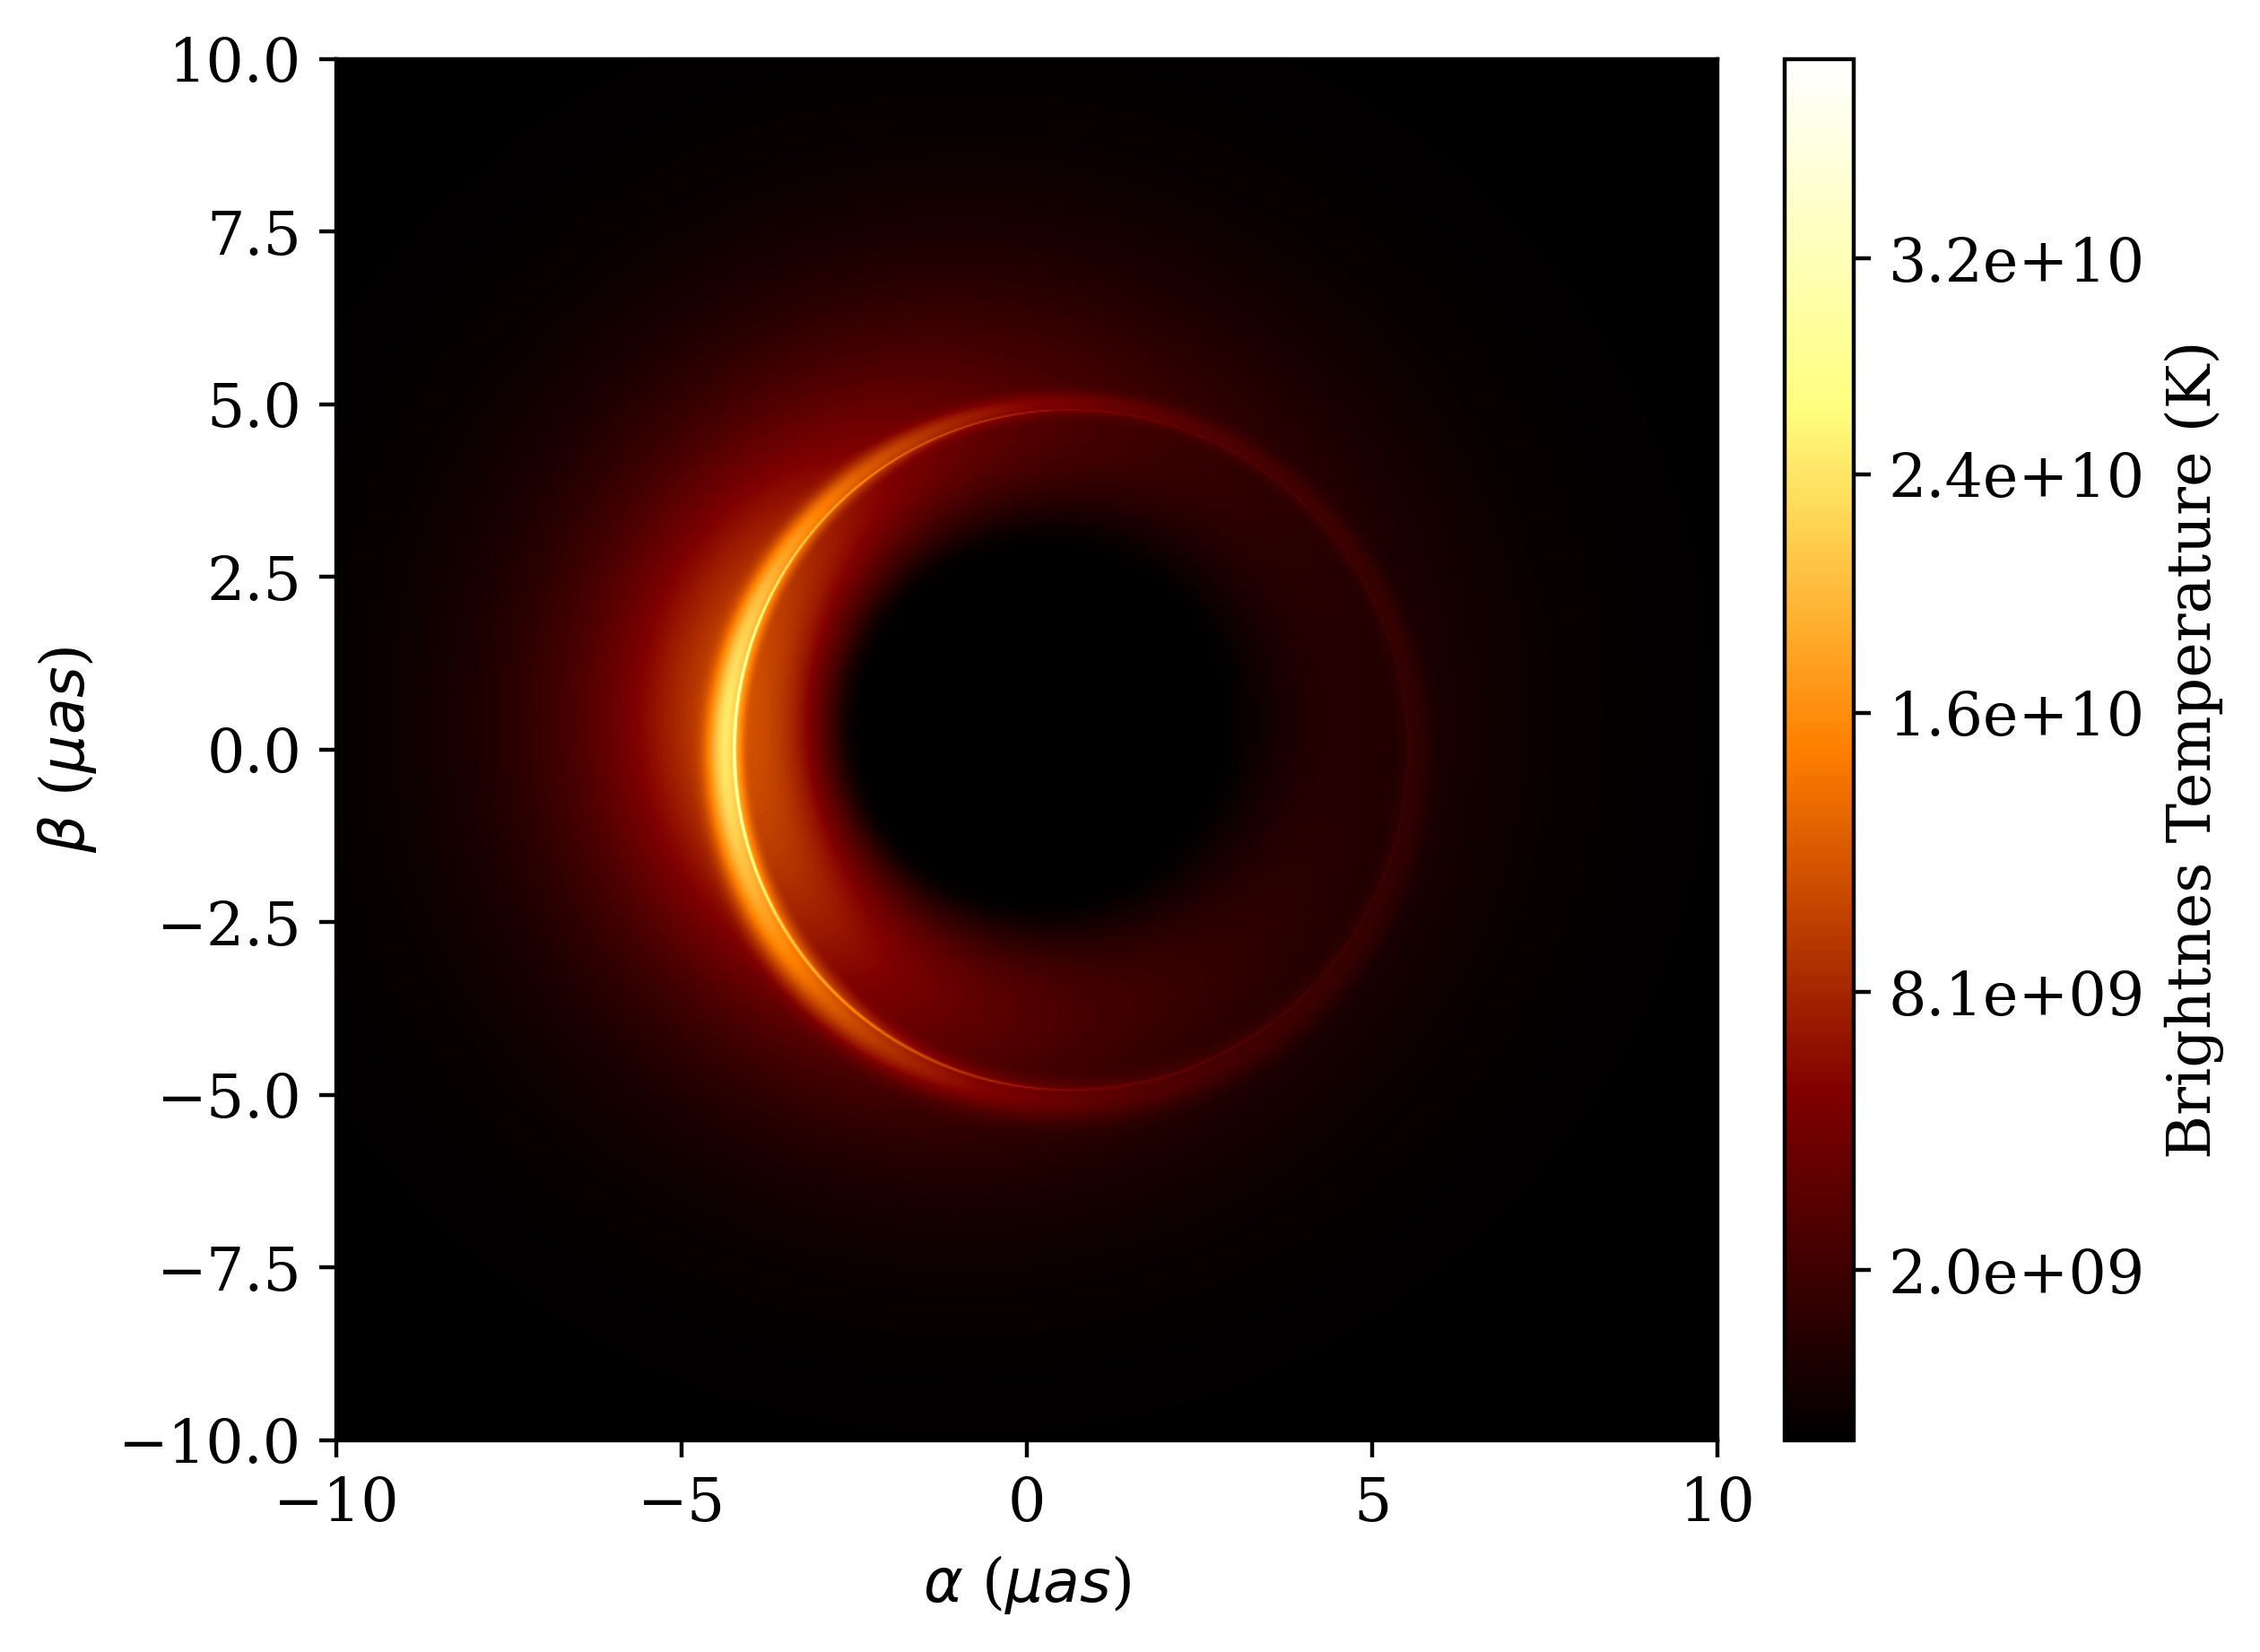

In [21]:
one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
M2rads = np.arctan(one_M.value / dBH)
M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas

vmax = np.max(I0+I1+I2)*1.2
vmin = np.max(I0+I1+I2)* .1
fig, ax = plt.subplots(figsize=[6,5],dpi=400)
#im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
im = ax.imshow(I0 + I1 + I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],
               norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))

#im = ax.imshow(blurred,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])


ax.set_xlim(-10,10) # units of M
ax.set_ylim(-10,10) 
    
ax.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")

# ax.set_xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
#     str('{:.3}'.format(-10 * M2uas)),
#     str('{:.3}'.format(-7.5 * M2uas)),
#     str('{:.3}'.format(-5 * M2uas)),
#     str('{:.3}'.format(-2.5 * M2uas)),
#     str('{:.3}'.format(0 * M2uas)),
#     str('{:.3}'.format(2.5 * M2uas)),
#     str('{:.3}'.format(5 * M2uas)), 
#     str('{:.3}'.format(7.5 * M2uas)), 
#     str('{:.3}'.format(10 * M2uas))
#     ])

# ax.set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
#     str('{:.3}'.format(-10 * M2uas)),
#     str('{:.3}'.format(-7.5 * M2uas)),
#     str('{:.3}'.format(-5 * M2uas)),
#     str('{:.3}'.format(-2.5 * M2uas)),
#     str('{:.3}'.format(0 * M2uas)),
#     str('{:.3}'.format(2.5 * M2uas)),
#     str('{:.3}'.format(5 * M2uas)), 
#     str('{:.3}'.format(7.5 * M2uas)), 
#     str('{:.3}'.format(10 * M2uas))
#     ])



colorbar=plt.colorbar(im, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax*.8,
    vmax*.6,
    vmax*.4,
    vmax*.2,
    vmax*.05
    ],
    label="Brightnes Temperature (K)"
    )

print(ilp.total_jy(I0 + I1 + I2, brightparams[0], brightparams[1]))

radius = tls.radii_of_theta(I0,100)
theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1) / 100)
radius1 = tls.radii_of_theta(I1,100)
radius2 = tls.radii_of_theta(I2,100)

alpha =  radius * np.cos(theta)
beta =  radius * np.sin(theta)
alpha1 =  radius1 * np.cos(theta)
beta1 =  radius1 * np.sin(theta)
alpha2 =  radius2 * np.cos(theta)
beta2 =  radius2 * np.sin(theta)

# plt.plot(alpha, beta, 'b')
# plt.plot(alpha2, beta2, 'r')
# plt.plot(alphas_inner, betas_inner, '--c')
# plt.plot(alphas_outer, betas_outer, '--m')

# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1)/100)
# radii = np.array(tls.radii_of_theta(I0,100)) /100
# beta =  radii * np.sin(theta)
# alpha =  radii * np.cos(theta)
# plt.plot(alpha, beta, 'r')
# plt.savefig('BHImage_a_{}_i_{}_nu_{}_mass_{}_scaleh_{}_thetab_{}_beta_{}_Rie_{}_Bchoi_{}_rb_{}_nth0_{}_te0_{}_pdens_{}_ptemp_{}.png'.format(
#     spin_case,
#     i_case,
#     "{:.1e}".format(brightparams[0]),
#     "{:.1e}".format(brightparams[1]), 
#     brightparams[2],
#     "{:.3e}".format(brightparams[3]), 
#     brightparams[4],
#     brightparams[5], 
#     brightparams[6],
#     brightparams[7],
#     "{:.1e}".format(brightparams[8]),
#     "{:.1e}".format(brightparams[9]),
#     brightparams[10],
#     brightparams[11]),
#     bbox_inches='tight'
# )
plt.show()

In [76]:

def curve_params(varphi, rho):
    """calculate Appendix B parameters for a curve rho(varphi)
       assume varphis are equally spaced!!!"""
          
    # spacing in varphi  
    dvarphi = varphi[-1]-varphi[-2]
    
    # area
    area = np.trapz(0.5*rho**2,dx=dvarphi)
    
    # centroid
    mux = np.trapz((rho**3*np.cos(varphi)) / (3*area), dx=dvarphi)
    muy = np.trapz((rho**3*np.sin(varphi)) / (3*area), dx=dvarphi)  

    # second moment
    Sxx = np.trapz((rho**4*np.cos(varphi)**2) / (4*area), dx=dvarphi) - mux**2
    Syy = np.trapz((rho**4*np.sin(varphi)**2) / (4*area), dx=dvarphi) - muy**2
    Sxy = np.trapz((rho**4*np.sin(varphi)*np.cos(varphi)) / (4*area), dx=dvarphi) - mux*muy
    
    # diagonalize 2nd moment matrix
    D = np.sqrt((Sxx-Syy)**2 + 4*Sxy*Sxy)
    a = np.sqrt(2*(Sxx + Syy + D))
    b = np.sqrt(2*(Sxx + Syy - D))
    
    #radius, eccentricity, position angle
    r = np.sqrt(0.5*(a**2 + b**2))
    e = np.sqrt(1-b**2/a**2)
    chi = 0.5*np.arcsin(2*Sxy/D)
    
    return (area, mux, muy, r, e, chi)    
    


In [79]:
print(curve_params(varphis, rhos_inner)[3])
print(curve_params(varphis, rhos_outer)[3])
print(curve_params(theta, radius)[3])
print(curve_params(theta, radius1)[3])

2.350252405149687
4.891664065523167
3.8789767014817045
4.890768667632074


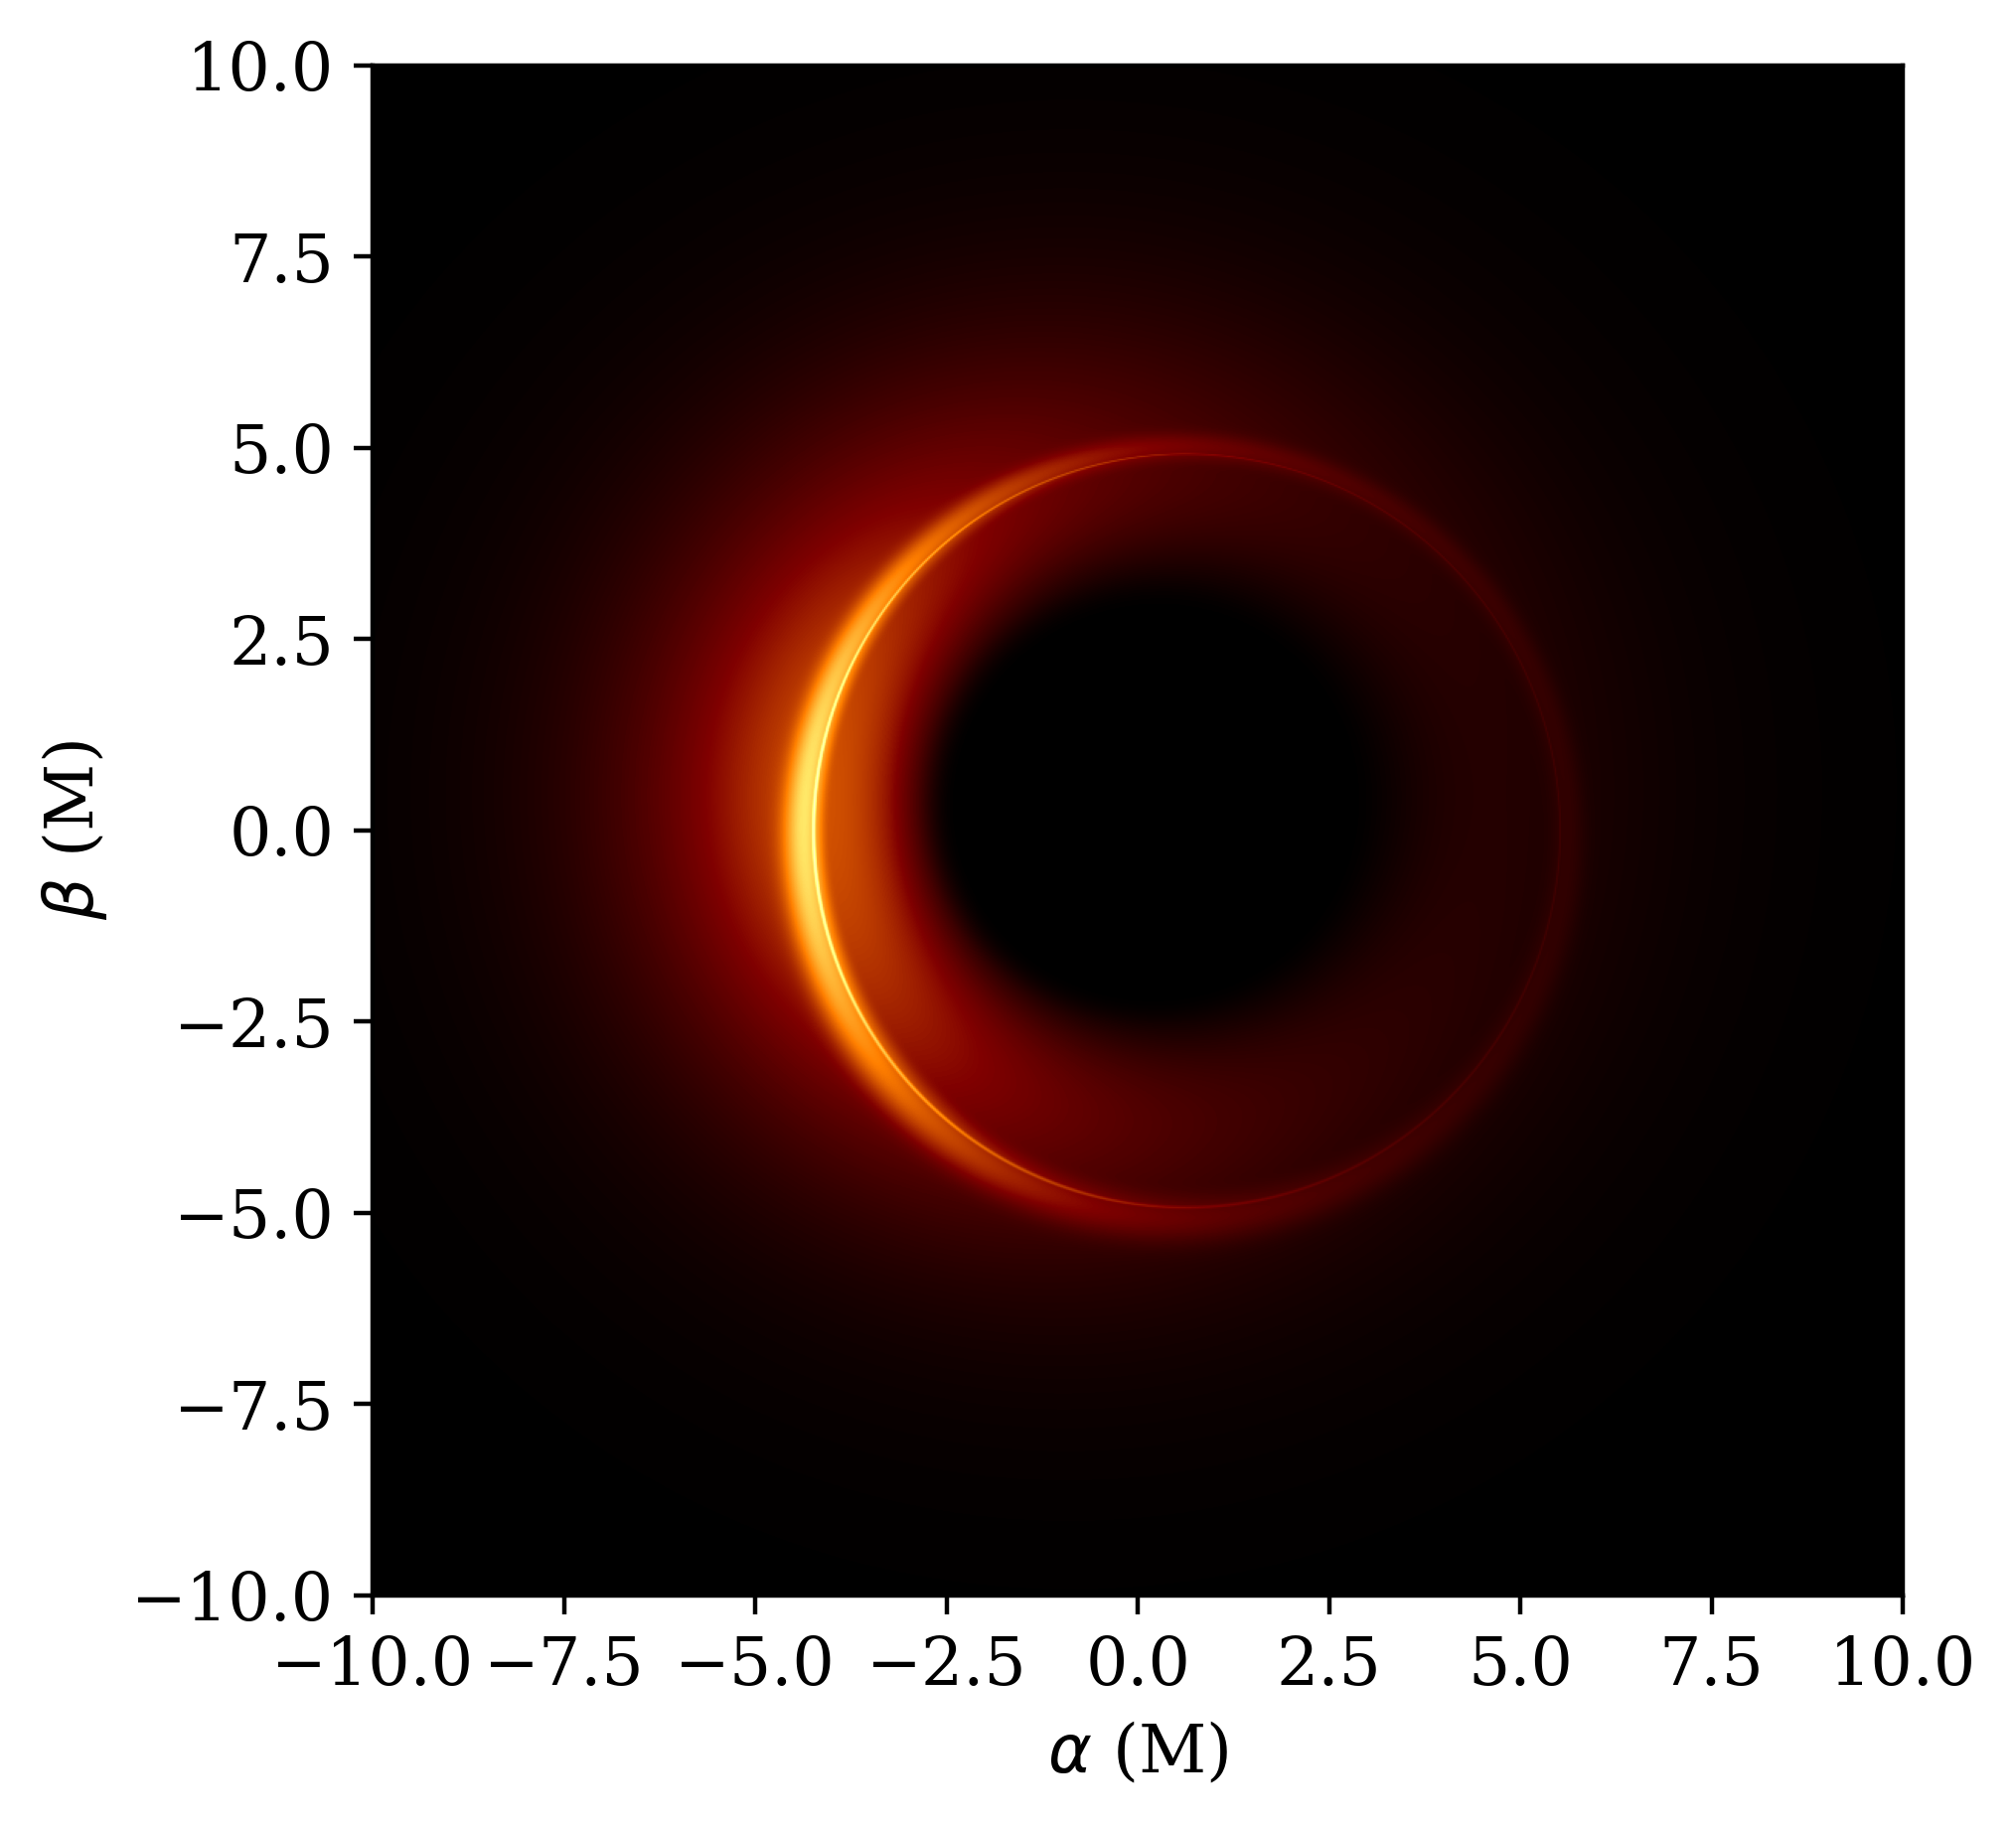

In [24]:
# Matching Example image

vmax = np.max(I0+I1+I2)*1.2
vmin = np.max(I0+I1+I2)* .1
fig, ax = plt.subplots(figsize=[5,5],dpi=400)
# im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
im = ax.imshow(I0 + I1 + I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],
               norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))


ax.set_xlim(-10,10) # units of M
ax.set_ylim(-10,10) # im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],
#                norm=matplotlib.colors.PowerNorm(.5,vmax=vmax))

#im = ax.imshow(blurred,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])



ax.set_xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])

ax.set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
    
ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")


plt.savefig('./Figures/Ideal_BHImage_a_{}_i_{}_nu_{}_mass_{}_scaleh_{}_thetab_{}_beta_{}_Rie_{}_Bchoi_{}_rb_{}_nth0_{}_te0_{}_pdens_{}_ptemp_{}.png'.format(
    spin_case,
    i_case,
    "{:.1e}".format(brightparams[0]),
    "{:.1e}".format(brightparams[1]), 
    brightparams[2],
    "{:.3e}".format(brightparams[3]), 
    brightparams[4],
    brightparams[5], 
    brightparams[6],
    brightparams[7],
    "{:.1e}".format(brightparams[8]),
    "{:.1e}".format(brightparams[9]),
    brightparams[10],
    brightparams[11]))
plt.show()

In [14]:
import skimage.filters

In [ ]:
sigma = 10.0

# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    (I0+I1+I2)/1e9, sigma=(sigma, sigma), truncate=3.5, channel_axis=-1)

In [ ]:
limits / I0.shape[0]  # pixels over M

In [ ]:
midpoint = int(I0.shape[0]/2)
diam  = ilp.ring_radius(I0) * (I0.shape[0] / (limits*2)) # in pixels
xval, yval = tls.center_finder(I0)
fig, ax = plt.subplots(1, 2, figsize=[20,6])
ax[0].plot(I0[:,midpoint])
ax[0].axvline(yval - diam, color='r')
ax[0].axvline(yval + diam, color='y')
ax[0].axvline(yval, color='0')
ax[0].set_xlim(500,2000)
ax[0].set_ylabel("Brightness Temp (K)", fontsize=15)
ax[0].set_xlabel("Vertical Pixels", fontsize=15)

ax[1].plot(I0[midpoint,:])
ax[1].axvline(xval - diam, color='r')
ax[1].axvline(xval + diam, color='y')
ax[1].axvline(xval, color='0')
ax[1].set_xlim(500,2000)
ax[1].set_xlabel("Horizontal Pixels", fontsize=15)
print(xval)


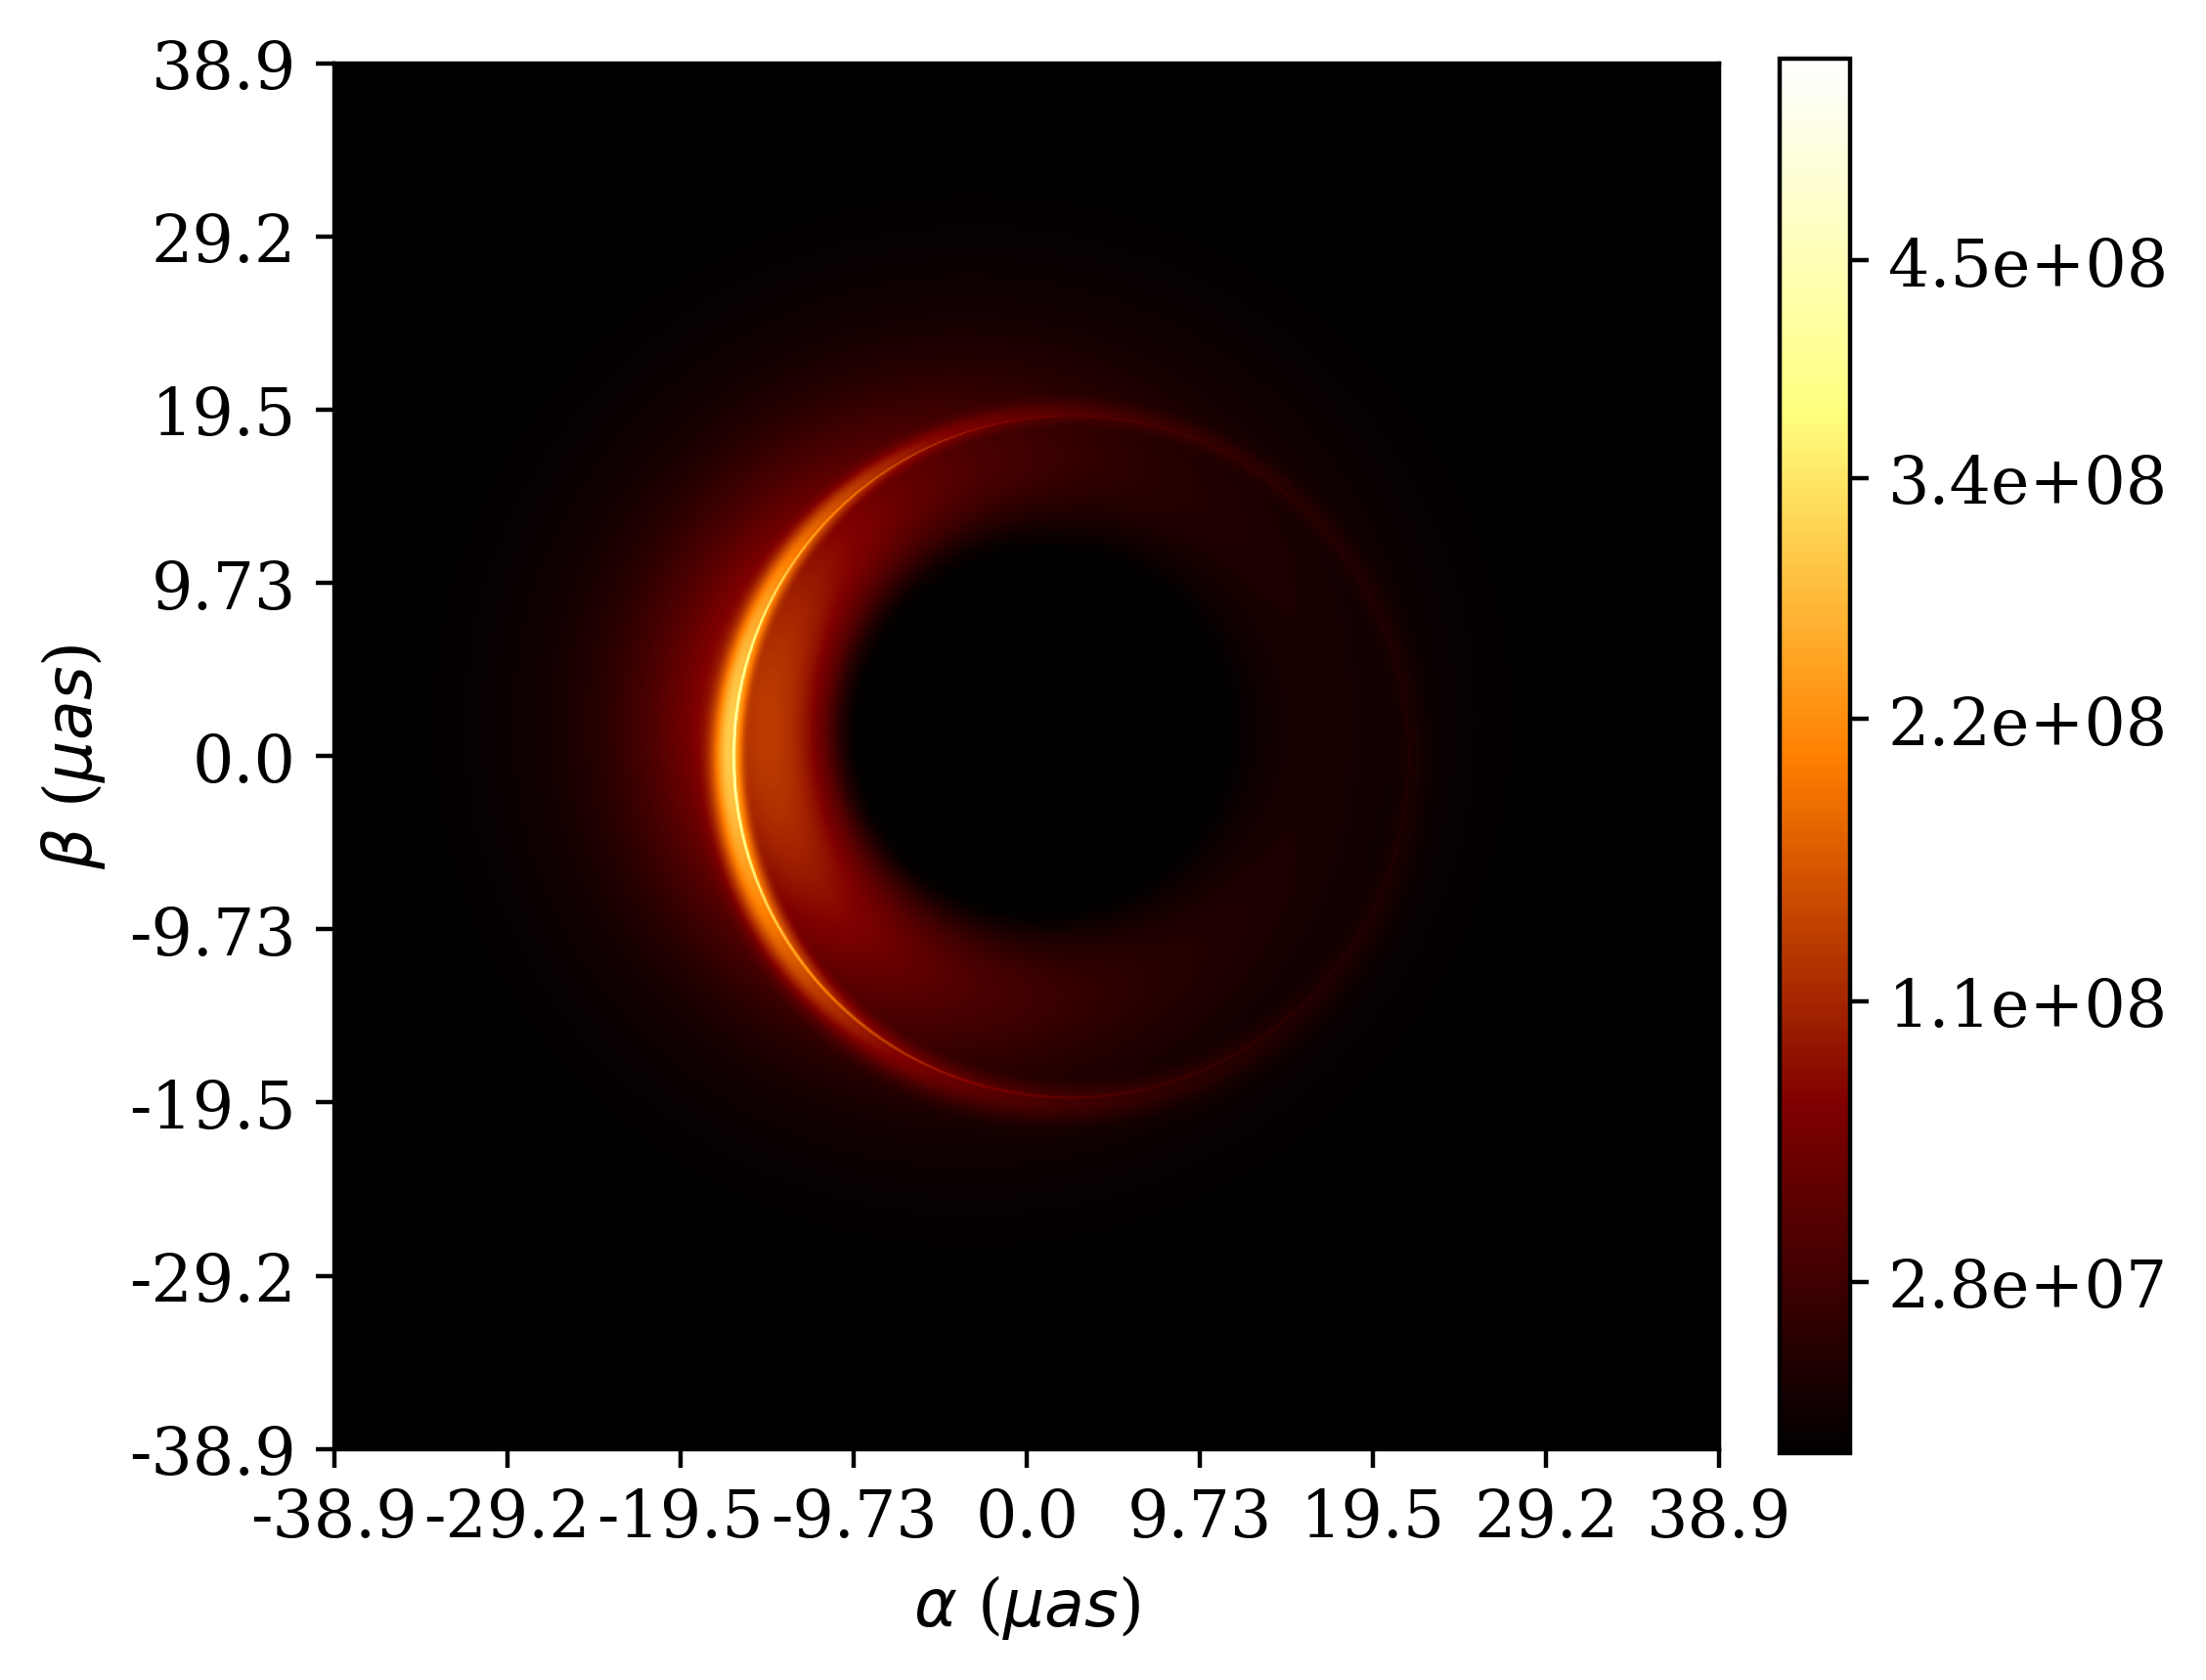

In [40]:
one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
M2rads = np.arctan(one_M.value / dBH)
M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas

radius  = ilp.ring_radius(I0) * (I0.shape[0] / (limits*2)) # in pixels
xval, yval = tls.center_finder(I0)


vmax = np.max(I0+I1+I2)*1.2
vmin = np.max(I0+I1+I2)* .1
fig, ax = plt.subplots(figsize=[5,5],dpi=400)
#im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],
               norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))

#im = ax.imshow(blurred,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])


ax.set_xlim(-10,10) # units of M
ax.set_ylim(-10,10) 
    
ax.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")

ax.set_xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
    str('{:.3}'.format(-10 * M2uas)),
    str('{:.3}'.format(-7.5 * M2uas)),
    str('{:.3}'.format(-5 * M2uas)),
    str('{:.3}'.format(-2.5 * M2uas)),
    str('{:.3}'.format(0 * M2uas)),
    str('{:.3}'.format(2.5 * M2uas)),
    str('{:.3}'.format(5 * M2uas)), 
    str('{:.3}'.format(7.5 * M2uas)), 
    str('{:.3}'.format(10 * M2uas))
    ])

ax.set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
    str('{:.3}'.format(-10 * M2uas)),
    str('{:.3}'.format(-7.5 * M2uas)),
    str('{:.3}'.format(-5 * M2uas)),
    str('{:.3}'.format(-2.5 * M2uas)),
    str('{:.3}'.format(0 * M2uas)),
    str('{:.3}'.format(2.5 * M2uas)),
    str('{:.3}'.format(5 * M2uas)), 
    str('{:.3}'.format(7.5 * M2uas)), 
    str('{:.3}'.format(10 * M2uas))
    ])

colorbar=plt.colorbar(im, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax*.8,
    vmax*.6,
    vmax*.4,
    vmax*.2,
    vmax*.05
    ])



# plt.savefig('BHImage_a_{}_i_{}_nu_{}_mass_{}_scaleh_{}_thetab_{}_beta_{}_Rie_{}_Bchoi_{}_rb_{}_nth0_{}_te0_{}_pdens_{}_ptemp_{}.png'.format(
    # spin_case,
    # i_case,
    # "{:.1e}".format(brightparams[0].value),
    # "{:.1e}".format(brightparams[1].value), 
    # brightparams[2],
    # "{:.3e}".format(brightparams[3].value), 
    # brightparams[4],
    # brightparams[5], 
    # brightparams[6],
    # brightparams[7],
    # "{:.1e}".format(brightparams[8].value),
    # "{:.1e}".format(brightparams[9].value),
    # brightparams[10],
    # brightparams[11])
plt.show()

[4.88 4.92 4.96 5.   5.02 5.06 5.08 5.1  5.12 5.12 5.14 5.14 5.14 5.14
 5.14 5.14 5.12 5.12 5.1  5.08 5.06 5.04 5.02 4.98 4.96 4.94 4.9  4.88
 4.84 4.82 4.78 4.76 4.72 4.68 4.66 4.62 4.6  4.56 4.54 4.5  4.48 4.46
 4.42 4.4  4.36 4.34 4.32 4.3  4.26 4.24 4.22 4.2  4.18 4.16 4.14 4.12
 4.12 4.1  4.1  4.1  4.08 4.08 4.1  4.1  4.1  4.12 4.12 4.14 4.16 4.2
 4.22 4.24 4.28 4.32 4.36 4.4  4.44 4.48 4.52 4.56 4.62 4.66 4.7  4.74
 4.8  4.84 4.88 4.92 4.96 4.98 5.02 5.04 5.08 5.1  5.12 5.12 5.14 5.14
 5.14 5.14]


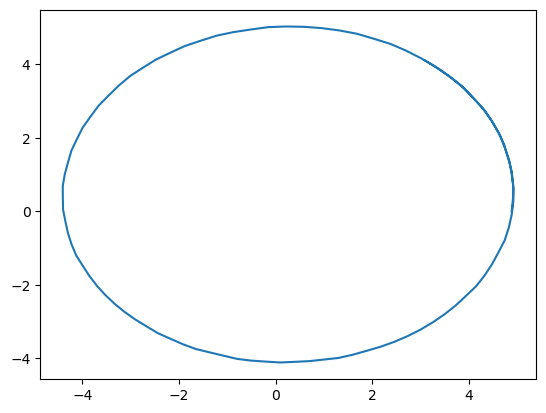

In [326]:
theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1)/100)
radii = np.array(tls.radii_of_theta(I0,100)) /100 * 2

alpha =  radii * np.cos(theta)
beta =  radii * np.sin(theta)
plt.plot(alpha, beta)
print(radii)

232.0


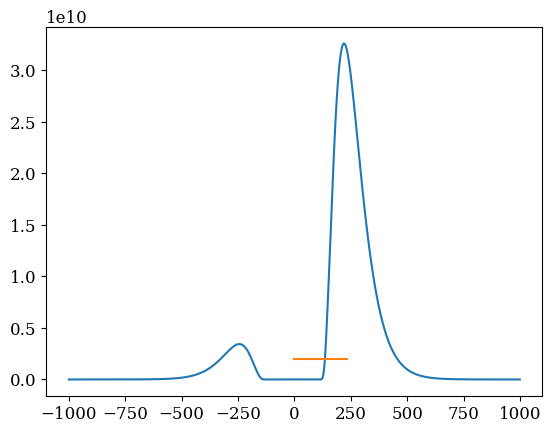

In [6]:
x = np.arange(I0.shape[0])
y = x
interp=RegularGridInterpolator((x,y), I0.T)
# Why do we need to transpose I0


rmax = 1000
rarray = np.arange(-rmax,rmax)
thetarray=np.ones(len(rarray)) * np.pi 

xaart = rarray * np.cos(thetarray)
yaart = rarray * np.sin(thetarray)
xprime = xaart + I0.shape[0] / 2
yprime = yaart + I0.shape[0] / 2

coords = np.array([xprime,yprime]).T
plt.plot(rarray, interp(coords))

radii = (tls.radii_finder(interp(coords)))
print(radii)
plt.plot([0, radii], [.2e10,.2e10])

[[1250.]
 [1251.]
 [1252.]
 ...
 [2248.]
 [2249.]
 [2250.]]


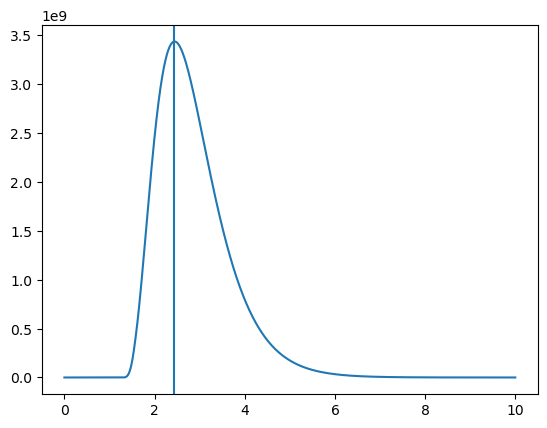

In [314]:
thetapointsamount = 100
x = np.arange(I0.shape[0])
y = x
interp = RegularGridInterpolator((x,y), I0.T)
rmax = 1000

theta = np.matrix(np.arange(0, 2*np.pi + 1, (2*np.pi + 1) / thetapointsamount)) # 1 x thetapointsamount
r = np.matrix(np.arange(rmax + 1)).T # (rmax + 1) x 1


onest = np.matrix(np.ones(r.shape[0])).T # (rmax+1) x 1
onesr = np.matrix(np.ones(thetapointsamount)) # 1 x thetapointsamount



thetarray= onest @ theta # (2rmax+1) x thetapointsamount
rarray = r @ onesr # (2rmax+1) x thetapointsamount

# Convert to pixel coords from aart plot coords
xaart = np.multiply(rarray , np.cos(thetarray))
yaart = np.multiply(rarray , np.sin(thetarray))
xprime = xaart + I0.shape[0] / 2
yprime = yaart + I0.shape[0] / 2


coords = np.array([xprime,yprime]).T

length = interp(coords).shape[1]
midpoint = int(length / 2)

peak = np.argmax(interp(coords), 1) / 100

# plot
# rarray = np.arange(-rmax, rmax + 1)
# thetarray=np.ones(len(rarray)) * 0 

# xaart = rarray * np.cos(thetarray)
# yaart = rarray * np.sin(thetarray)
# xprime = xaart + I0.shape[0] / 2
# yprime = yaart + I0.shape[0] / 2
# coords = np.array([xprime,yprime]).T

# plt.plot(rarray / 100, interp(coords))
# plt.axvline(peak[0])
# plt.axvline(-peak[50])
print(xprime[:,0])
peak = tls.radii_of_theta(I0, 100) / 100
plt.plot(np.squeeze(np.asarray(r)) / 100, np.squeeze(np.asarray(interp(np.array([xprime[:,0],yprime[:,0]]).T))))
plt.axvline(peak[0])
# plt.plot(np.squeeze(np.asarray(theta)), peak)

# Figures

In [8]:
r_array = np.logspace(np.log10(2), np.log10(50)) * u.dimensionless_unscaled
r_array[0].unit
def j_coeff_func(r, redshift, nu0=ilp.kw_nu0,mass=ilp.kw_mass, theta_b=ilp.kw_theta_b, 
            beta=ilp.kw_beta,rb_0=ilp.kw_rb_0,n_th0=ilp.kw_n_th0,t_e0=ilp.kw_t_e0,p_dens=ilp.kw_p_dens,p_temp=ilp.kw_p_temp):
    n = ilp.nth_func(r,mass,rb_0,n_th0,p_dens)
    theta_e = ilp.theta_e_func(r,mass,rb_0,t_e0,p_temp)
    nu_c = ilp.nu_c_func(r,mass,theta_b,rb_0,t_e0,p_temp)
    nu = nu0/redshift
    x = nu / (nu_c)
    # Returns units of [u.erg / (u.cm ** 3 * u.s * u.Hz)]
    return n * ilp.e ** 2 * nu * ilp.synchrotron_func(x) / (2 * np.sqrt(3) * ilp.c * theta_e ** 2)

(2.0, 50.0)

<Figure size 640x480 with 0 Axes>

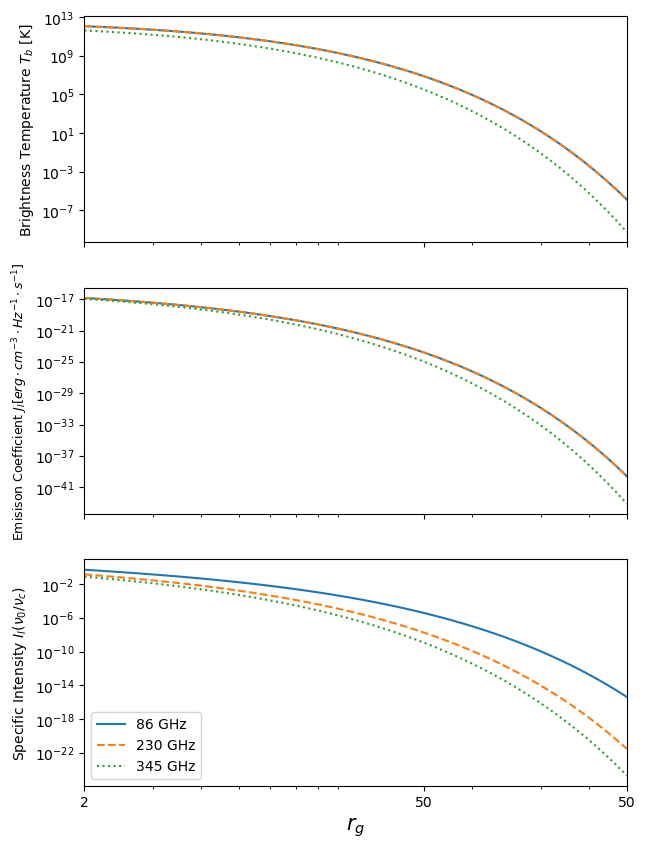

In [12]:
'''FIGURE 1--------------------------------------------------------------------------------------------------'''

ilp.set_b_params()
plt.figure(1)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex='col', figsize=(7,10))


# subplot 1--------------------------------------------------------------------------------------------------
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(r_array,ilp.profile(r_array, 1), label = "86 GHz")
ax1.plot(r_array,ilp.profile(r_array, 1, nu0=230e9 * ilp.Hz), label = "230 GHz", linestyle='--')
ax1.plot(r_array,ilp.profile(r_array, 1, nu0=345e9 * ilp.Hz), label = "345 GHz", linestyle=':')
ax1.set_ylabel(R'Brightness Temperature $T_b$ [K]',fontsize=10)


# subplot 2--------------------------------------------------------------------------------------------------
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.plot(r_array,j_coeff_func(r_array, 1), label = "86 GHz")
ax2.plot(r_array,j_coeff_func(r_array, 1, nu0=230e9 * ilp.Hz), label = "230 GHz", linestyle='--')
ax2.plot(r_array,j_coeff_func(r_array, 1, nu0=345e9 * ilp.Hz), label = "345 GHz", linestyle=':')

ax2.set_ylabel(R'Emisison Coefficient $J_I [erg \cdot  cm^{-3} \cdot Hz^{-1} \cdot s^{-1}]$',fontsize=9)
#ax2.set_ylabel(R'$J_I [\frac{erg}{cm^{3} \cdot Hz \cdot s}]$',fontsize=15)

# subplot 2--------------------------------------------------------------------------------------------------
ax3.plot(r_array,ilp.synchrotron_func(86e9 * u.Hz / ilp.nu_c_func(r_array)), label = "86 GHz")
ax3.plot(r_array,ilp.synchrotron_func(230e9 * u.Hz / ilp.nu_c_func(r_array)), label = "230 GHz", linestyle='--')
ax3.plot(r_array,ilp.synchrotron_func(345e9 * u.Hz / ilp.nu_c_func(r_array)), label = "345 GHz", linestyle=':')

ax3.legend(loc='lower left')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xticks([2, 15, 50], labels=['2', '50', '50'])

ax3.set_xlabel(R'$r_g$',fontsize=15)
ax3.set_ylabel(R'Specific Intensity $I_I(\nu_0 / \nu_c)$',fontsize=10)

ax1.set_xlim([2,50])

#plt.savefig("./Figures/Figure_1")

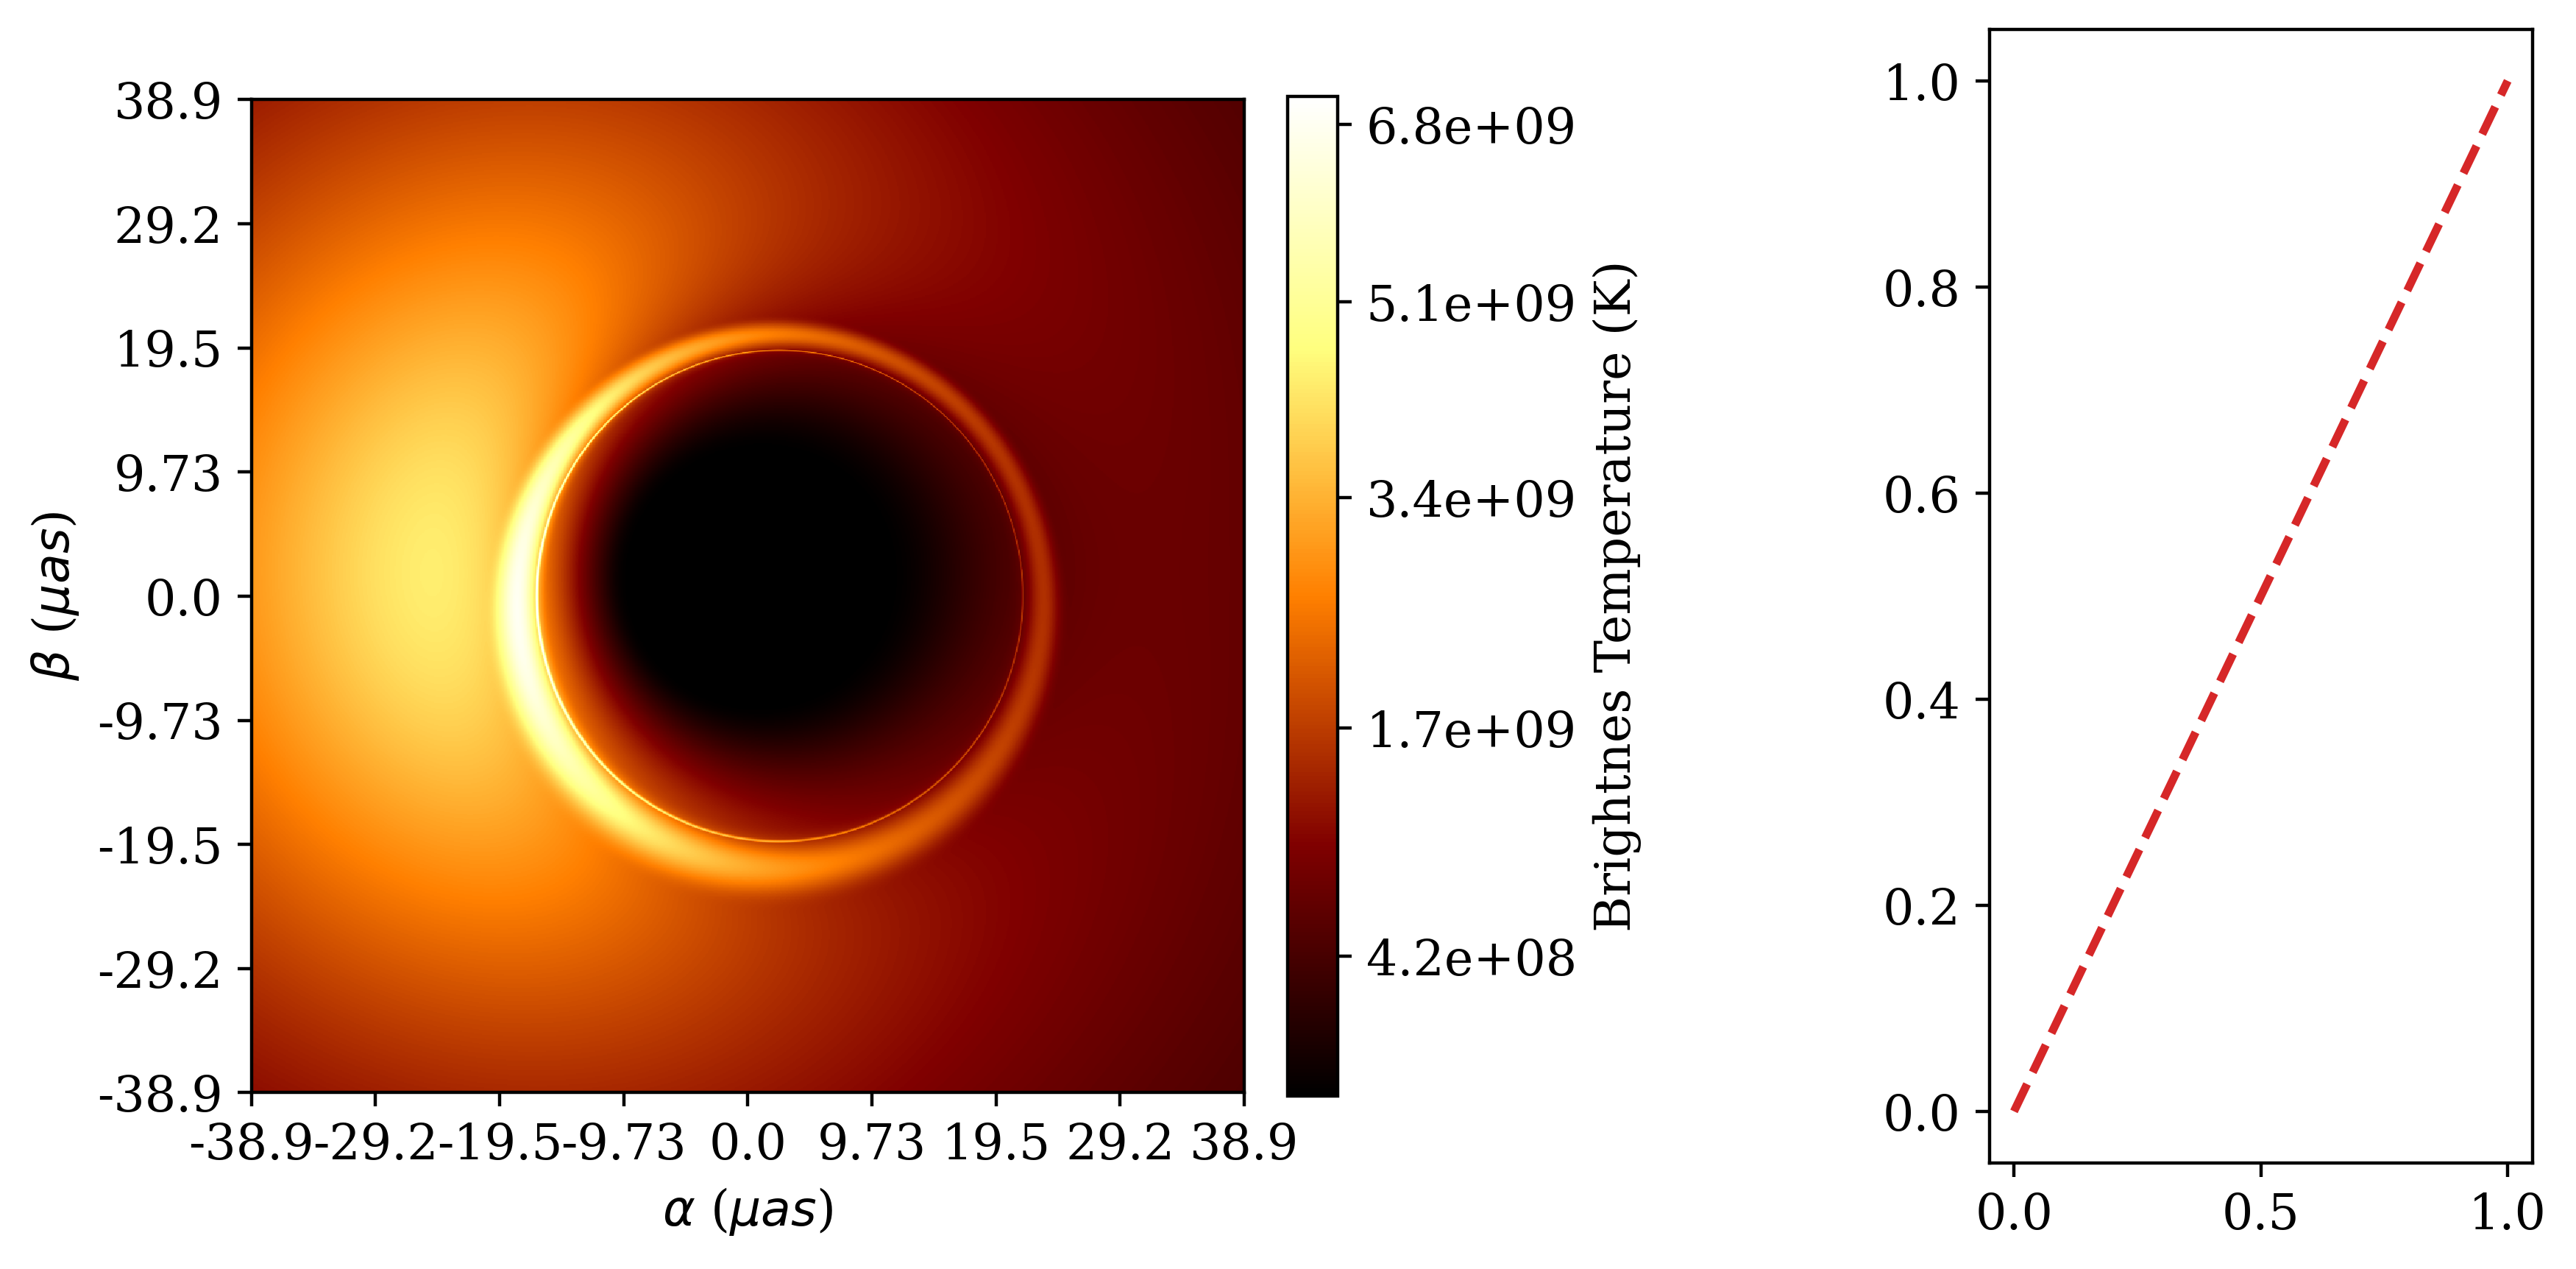

In [78]:
fig = plt.subplots(1,2, figsize=[10,5],dpi=400, width_ratios=[2,1])

ax = [None, None]

ax[0] = plt.subplot(1,2,1)
#im = ax[0].imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
im = ax[0].imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],
            norm=matplotlib.colors.PowerNorm(.7,vmax=np.max(I0 + I1 + I2)), interpolation='nearest')
ax[0].set_xlim(-10,10) # units of M
ax[0].set_ylim(-10,10) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.8, hspace=None)
ax[0].set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax[0].set_ylabel(r"$\beta$"+" "+r"($\mu as$)")

ax[0].set_xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
    str('{:.3}'.format(-10 * M2uas)),
    str('{:.3}'.format(-7.5 * M2uas)),
    str('{:.3}'.format(-5 * M2uas)),
    str('{:.3}'.format(-2.5 * M2uas)),
    str('{:.3}'.format(0 * M2uas)),
    str('{:.3}'.format(2.5 * M2uas)),
    str('{:.3}'.format(5 * M2uas)), 
    str('{:.3}'.format(7.5 * M2uas)), 
    str('{:.3}'.format(10 * M2uas))
    ])

ax[0].set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
    str('{:.3}'.format(-10 * M2uas)),
    str('{:.3}'.format(-7.5 * M2uas)),
    str('{:.3}'.format(-5 * M2uas)),
    str('{:.3}'.format(-2.5 * M2uas)),
    str('{:.3}'.format(0 * M2uas)),
    str('{:.3}'.format(2.5 * M2uas)),
    str('{:.3}'.format(5 * M2uas)), 
    str('{:.3}'.format(7.5 * M2uas)), 
    str('{:.3}'.format(10 * M2uas))
    ])

colorbar=plt.colorbar(im, fraction=0.046, pad=0.04, format='%.1e', ticks=[
vmax*.8,
vmax*.6,
vmax*.4,
vmax*.2,
vmax*.05
],
label="Brightnes Temperature (K)"
)

ax[1] = plt.subplot(1,2,2)
ax[1].plot([0,1], [0,1], '--', label='N=0', color='tab:red', linewidth=2)




/tmp/ipykernel_4293/4126842922.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(2,1,2)


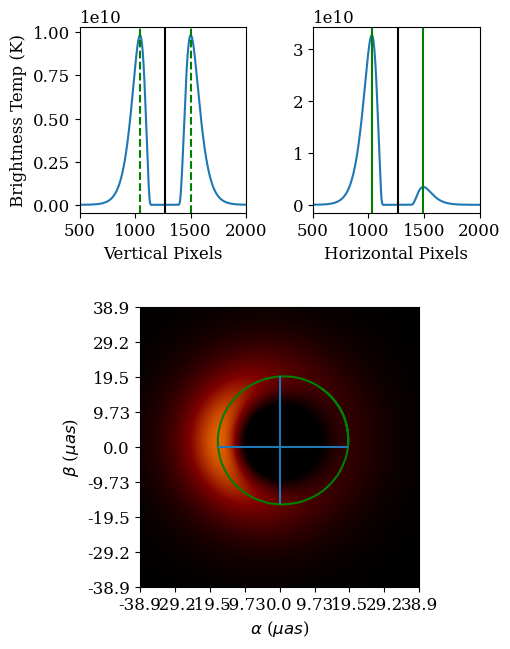

In [98]:
def thetaconvert(thetanumber): 
    return int((thetanumber / (2*np.pi + 1)) * 100)

'''FIGURE 2--------------------------------------------------------------------------------------------------'''
midpoint = int(I0.shape[0]/2)
diam  = ilp.ring_radius(I0) * (I0.shape[0] / (limits*2)) # in pixels
xval, yval = tls.center_finder(I0)
fig = plt.subplots(2, 2, figsize=[10,14], height_ratios=[1,2])


radius = tls.radii_of_theta(I0,100)
theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1) / 100)

print()

alpha =  radius * np.cos(theta)
beta =  radius * np.sin(theta)

ax = [None, None, None]
ax[0] = plt.subplot(2,2,1)
ax[1] = plt.subplot(2,2,2)
ax[2] = plt.subplot(2,1,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=.5,
                    wspace=0.4,
                    hspace=0.001)


ax[0].plot(I0[:,midpoint])
ax[0].axvline(yval - diam, color='g', linestyle='--')
ax[0].axvline(yval + diam, color='g',linestyle='--')
ax[0].axvline(yval, color='0')
ax[0].set_xlim(500,2000)
ax[0].set_ylabel("Brightness Temp (K)", fontsize=12)
ax[0].set_xlabel("Vertical Pixels", fontsize=12)


ax[1].plot(I0[midpoint,:])
ax[1].axvline(xval - diam, color='g')
ax[1].axvline(xval + diam, color='g')
ax[1].axvline(xval, color='0')
ax[1].set_xlim(500,2000)
ax[1].set_xlabel("Horizontal Pixels", fontsize=12)


one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
M2rads = np.arctan(one_M.value / dBH)
M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas

xval, yval = tls.center_finder(I0)


vmax = np.max(I0+I1+I2)*1.2
vmin = np.max(I0+I1+I2)* .1
im = ax[2].imshow(I0,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],
               norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))

# #im = ax.imshow(blurred,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])


ax[2].set_xlim(-10,10) # units of M
ax[2].set_ylim(-10,10) 
    
ax[2].set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax[2].set_ylabel(r"$\beta$"+" "+r"($\mu as$)")

ax[2].set_xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
    str('{:.3}'.format(-10 * M2uas)),
    str('{:.3}'.format(-7.5 * M2uas)),
    str('{:.3}'.format(-5 * M2uas)),
    str('{:.3}'.format(-2.5 * M2uas)),
    str('{:.3}'.format(0 * M2uas)),
    str('{:.3}'.format(2.5 * M2uas)),
    str('{:.3}'.format(5 * M2uas)), 
    str('{:.3}'.format(7.5 * M2uas)), 
    str('{:.3}'.format(10 * M2uas))
    ])

ax[2].set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
    str('{:.3}'.format(-10 * M2uas)),
    str('{:.3}'.format(-7.5 * M2uas)),
    str('{:.3}'.format(-5 * M2uas)),
    str('{:.3}'.format(-2.5 * M2uas)),
    str('{:.3}'.format(0 * M2uas)),
    str('{:.3}'.format(2.5 * M2uas)),
    str('{:.3}'.format(5 * M2uas)), 
    str('{:.3}'.format(7.5 * M2uas)), 
    str('{:.3}'.format(10 * M2uas))
    ])

ax[2].plot(alpha, beta, 'g')


ax[2].vlines((xval - (I0.shape[0] / 2)) / I0.shape[0], -radius[thetaconvert( 3 * np.pi / 2)], radius[thetaconvert(np.pi / 2)], color='tab:blue')
ax[2].hlines((yval - (I0.shape[0] / 2)) / I0.shape[0] , -radius[thetaconvert( np.pi)], radius[0], color='tab:blue')

plt.savefig('./Figures/Figure_2.png', bbox_inches='tight')


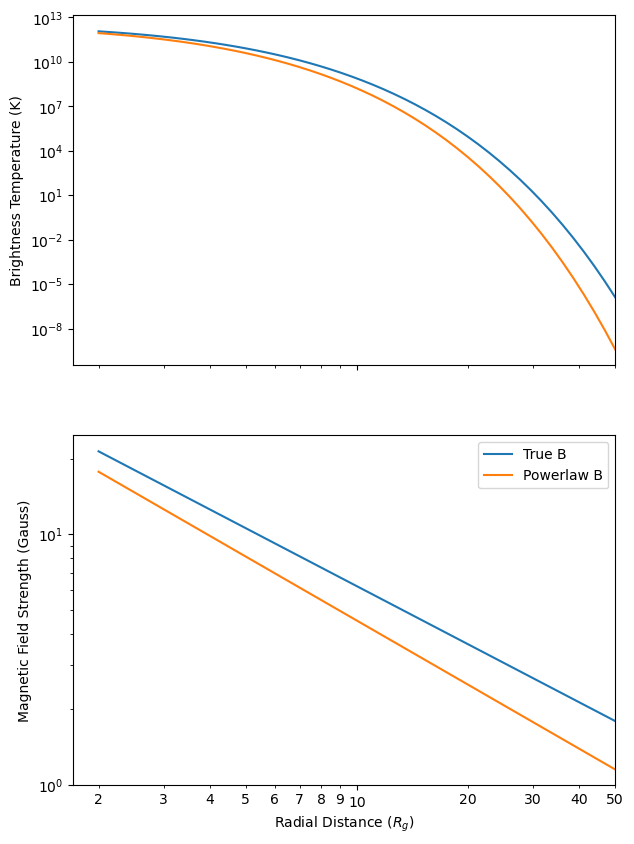

In [15]:
'''FIGURE 3--------------------------------------------------------------------------------------------------'''

fig = plt.subplots(2,1, sharex='col', figsize=(7,10))
ax = [None, None, None]
ilp.set_b_params()

ax[0] = plt.subplot(2,1,1)
ax[0].plot(r_array,ilp.profile(r_array, 1), label='Altered Equation Profile')
ax[0].plot(r_array,ilp.profile(r_array, 1, Bchoice=1),  label='Power law B Profile')
ax[0].set_ylabel('Brightness Temperature (K)')
plt.yscale('log')




ax[1] = plt.subplot(2,1,2)
plt.xscale('log')
plt.yscale('log')
ax[1].minorticks_on()
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))

# n = 3  # Keeps every 4th label
ax[1].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
# [l.set_visible(False) for (i,l) in enumerate(ax[1].xaxis.get_minorticklabels()) if i % n != 0]
# ax[1].tick_params('both', length=10, width=1, which='major')


ax[1].plot(r_array,ilp.b_func_true(r_array),  label='True B')
ax[1].plot(r_array,ilp.b_func_power(r_array, 1), label='Powerlaw B')
ax[1].set_ylabel('Magnetic Field Strength (Gauss)')
ax[1].set_xlabel('Radial Distance' + R' ($R_g$)')
ax[1].set_xlim([0,50])



plt.legend()

plt.savefig('./Figures/Figure_3.png', bbox_inches='tight')


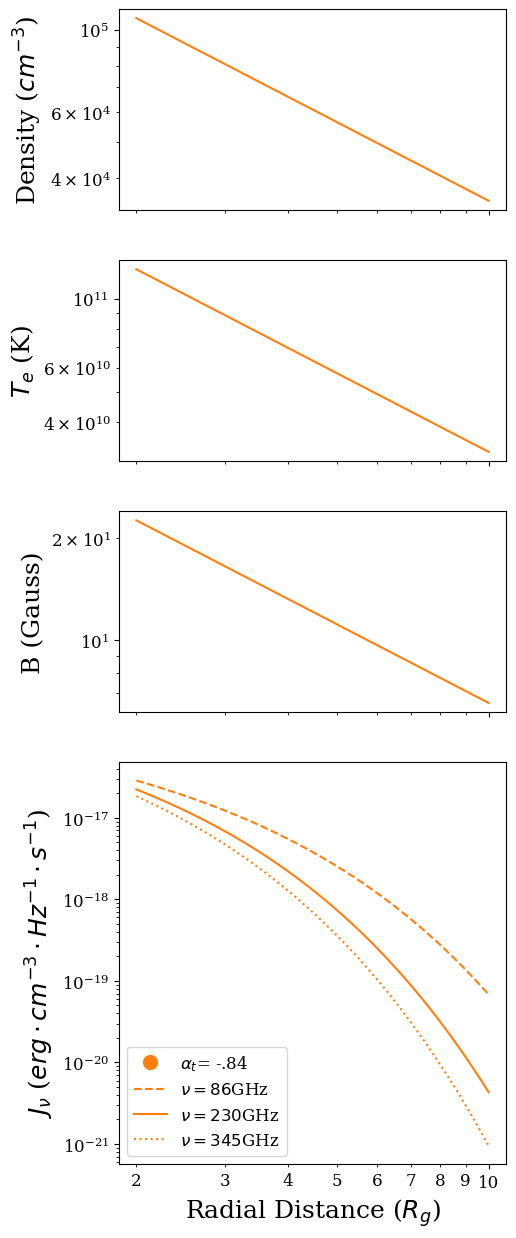

In [19]:
r_array = np.logspace(np.log10(2), np.log10(10)) * u.dimensionless_unscaled
r_array[0].unit
def j_coeff_func(r, redshift, nu0=ilp.kw_nu0,mass=ilp.kw_mass, theta_b=ilp.kw_theta_b, 
            beta=ilp.kw_beta,rb_0=ilp.kw_rb_0,n_th0=ilp.kw_n_th0,t_e0=ilp.kw_t_e0,p_dens=ilp.kw_p_dens,p_temp=ilp.kw_p_temp):
    n = ilp.nth_func(r,mass,rb_0,n_th0,p_dens)
    theta_e = ilp.theta_e_func(r,mass,rb_0,t_e0,p_temp)
    nu_c = ilp.nu_c_func(r,mass,theta_b,rb_0,t_e0,p_temp)
    nu = nu0/redshift
    x = nu / (nu_c)
    # Returns units of [u.erg / (u.cm ** 3 * u.s * u.Hz)]
    return n * ilp.e ** 2 * nu * ilp.synchrotron_func(x) / (2 * np.sqrt(3) * ilp.c * theta_e ** 2)

'''FIGURE 4--------------------------------------------------------------------------------------------------'''

fig = plt.subplots(4,1, sharex='col', figsize=(5,15), height_ratios=[1,1,1,2])

ax = [None, None, None, None]

# Feducial ORange
# 	1.23e4, # n_th0
# 	8.1e9, # t_e0
# 	-.7, # p_dens
# 	-.84 # p_temp

# Steeper Blue
# 	2.9726e+05, # n_th0
# 	-.7, # p_dens
# 	-1.6 # p_temp

# Shallower RED
# 	2.1526e+04, # n_th0
# 	-.7, # p_dens
# 	-.3 # p_temp


# Subplot 1-----------------------------------------
ax[0] = plt.subplot(4,1,1)

ax[0].plot(r_array, ilp.nth_func(r_array), 'tab:orange')

ax[0].set_ylabel('Density ({})'.format(R'$cm^{-3}$'), fontsize=18)
ax[0].set_yscale('log')


# Subplot 1-----------------------------------------
ax[1] = plt.subplot(4,1,2)


ax[1].plot(r_array, ilp.te_func(r_array), 'tab:orange')


ax[1].set_ylabel(R'$T_e$ (K)', fontsize=18)
ax[1].set_yscale('log')


# Subplot 1-----------------------------------------
ax[2] = plt.subplot(4,1,3)

ax[2].plot(r_array, ilp.b_func_true(r_array), 'tab:orange')



ax[2].set_yscale('log')
ax[2].set_ylabel('B (Gauss)', fontsize=18)

# Subplot 1-----------------------------------------
ax[3] = plt.subplot(4,1,4)



ax[3].plot(r_array, ilp.emission_coeff(r_array,1), 'tab:orange',label="ptemp: -.84")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0 =86e9 * ilp.Hz), 'tab:orange', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0=345e9 * ilp.Hz), 'tab:orange', linestyle=':')


ax[3].set_ylabel(R'$J_\nu$ ($erg \cdot cm^{-3} \cdot Hz^{-1} \cdot s^{-1}$)', fontsize=18)
ax[3].set_yscale('log')
ax[3].set_xscale('log')
ax[3].minorticks_on()
ax[3].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax[3].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
ax[3].set_xlabel('Radial Distance ({})'.format(R'$R_g$'), fontsize=18 )
lines = [
    Line2D([0],[0],marker='o', markerfacecolor='tab:orange', color='w', markersize=12),
    Line2D([0,1],[0,1],linestyle='--', color='tab:orange'), 
    Line2D([0,1],[0,1],linestyle='-', color='tab:orange'), 
    Line2D([0,1],[0,1],linestyle=':', color='tab:orange')
    ]
labels = [
    R"$\alpha_t$= -.84",
    R'$\nu = 86$GHz',
    R'$\nu = 230$GHz',
    R'$\nu = 345$GHz'
          ]

ax[3].legend(lines,labels)

plt.savefig('./Figures/Figure_4_0.png', bbox_inches='tight')

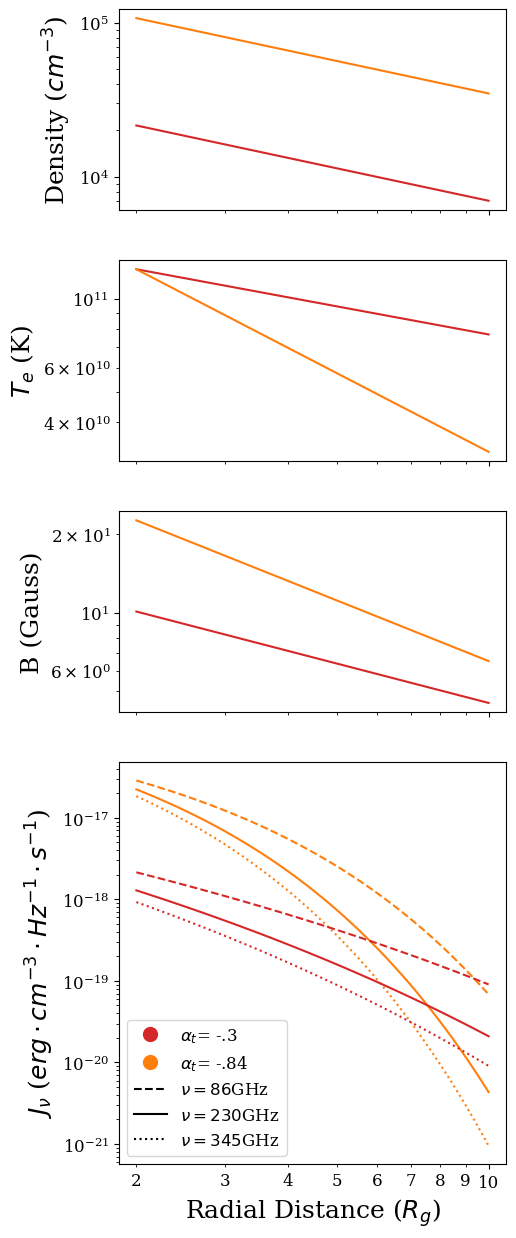

In [23]:
r_array = np.logspace(np.log10(2), np.log10(10)) * u.dimensionless_unscaled
r_array[0].unit
def j_coeff_func(r, redshift, nu0=ilp.kw_nu0,mass=ilp.kw_mass, theta_b=ilp.kw_theta_b, 
            beta=ilp.kw_beta,rb_0=ilp.kw_rb_0,n_th0=ilp.kw_n_th0,t_e0=ilp.kw_t_e0,p_dens=ilp.kw_p_dens,p_temp=ilp.kw_p_temp):
    n = ilp.nth_func(r,mass,rb_0,n_th0,p_dens)
    theta_e = ilp.theta_e_func(r,mass,rb_0,t_e0,p_temp)
    nu_c = ilp.nu_c_func(r,mass,theta_b,rb_0,t_e0,p_temp)
    nu = nu0/redshift
    x = nu / (nu_c)
    # Returns units of [u.erg / (u.cm ** 3 * u.s * u.Hz)]
    return n * ilp.e ** 2 * nu * ilp.synchrotron_func(x) / (2 * np.sqrt(3) * ilp.c * theta_e ** 2)

'''FIGURE 4--------------------------------------------------------------------------------------------------'''

fig = plt.subplots(4,1, sharex='col', figsize=(5,15), height_ratios=[1,1,1,2])

ax = [None, None, None, None]

# Feducial ORange
# 	1.23e4, # n_th0
# 	8.1e9, # t_e0
# 	-.7, # p_dens
# 	-.84 # p_temp

# Steeper Blue
# 	2.9726e+05, # n_th0
# 	-.7, # p_dens
# 	-1.6 # p_temp

# Shallower RED
# 	2.1526e+04, # n_th0
# 	-.7, # p_dens
# 	-.3 # p_temp


# Subplot 1-----------------------------------------
ax[0] = plt.subplot(4,1,1)
ax[0].plot(r_array, ilp.nth_func(r_array, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red')
ax[0].plot(r_array, ilp.nth_func(r_array), 'tab:orange')


ax[0].set_ylabel('Density ({})'.format(R'$cm^{-3}$'), fontsize=18)
ax[0].set_yscale('log')


# Subplot 1-----------------------------------------
ax[1] = plt.subplot(4,1,2)

ax[1].plot(r_array, ilp.te_func(r_array, p_temp=-.3), 'tab:red')
ax[1].plot(r_array, ilp.te_func(r_array), 'tab:orange')


ax[1].set_ylabel(R'$T_e$ (K)', fontsize=18)
ax[1].set_yscale('log')


# Subplot 1-----------------------------------------
ax[2] = plt.subplot(4,1,3)

ax[2].plot(r_array, ilp.b_func_true(r_array, p_temp=-.3, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red')
ax[2].plot(r_array, ilp.b_func_true(r_array), 'tab:orange')



ax[2].set_yscale('log')
ax[2].set_ylabel('B (Gauss)', fontsize=18)

# Subplot 1-----------------------------------------
ax[3] = plt.subplot(4,1,4)

ax[3].plot(r_array, ilp.emission_coeff(r_array,1), 'tab:orange',label="ptemp: -.84")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0 =86e9 * ilp.Hz), 'tab:orange', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0=345e9 * ilp.Hz), 'tab:orange', linestyle=':')

ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', label=R"$\alpha_t$= -.3")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, nu0 =86e9 * ilp.Hz, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, nu0=345e9 * ilp.Hz, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', linestyle=':')

ax[3].set_ylabel(R'$J_\nu$ ($erg \cdot cm^{-3} \cdot Hz^{-1} \cdot s^{-1}$)', fontsize=18)
ax[3].set_yscale('log')
ax[3].set_xscale('log')
ax[3].minorticks_on()
ax[3].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax[3].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
ax[3].set_xlabel('Radial Distance ({})'.format(R'$R_g$'), fontsize=18 )

lines = [
    Line2D([0],[0],marker='o', markerfacecolor='tab:red', color='w', markersize=12),
    Line2D([0],[0],marker='o', markerfacecolor='tab:orange', color='w', markersize=12),
    Line2D([0,1],[0,1],linestyle='--', color='k'), 
    Line2D([0,1],[0,1],linestyle='-', color='k'), 
    Line2D([0,1],[0,1],linestyle=':', color='k')
    ]
labels = [
    R"$\alpha_t$= -.3",
    R"$\alpha_t$= -.84",
    R'$\nu = 86$GHz',
    R'$\nu = 230$GHz',
    R'$\nu = 345$GHz'
          ]

ax[3].legend(lines,labels, loc='lower left')




plt.savefig('./Figures/Figure_4_1.png', bbox_inches='tight')

YAxis(62.5,164.9999999999998)


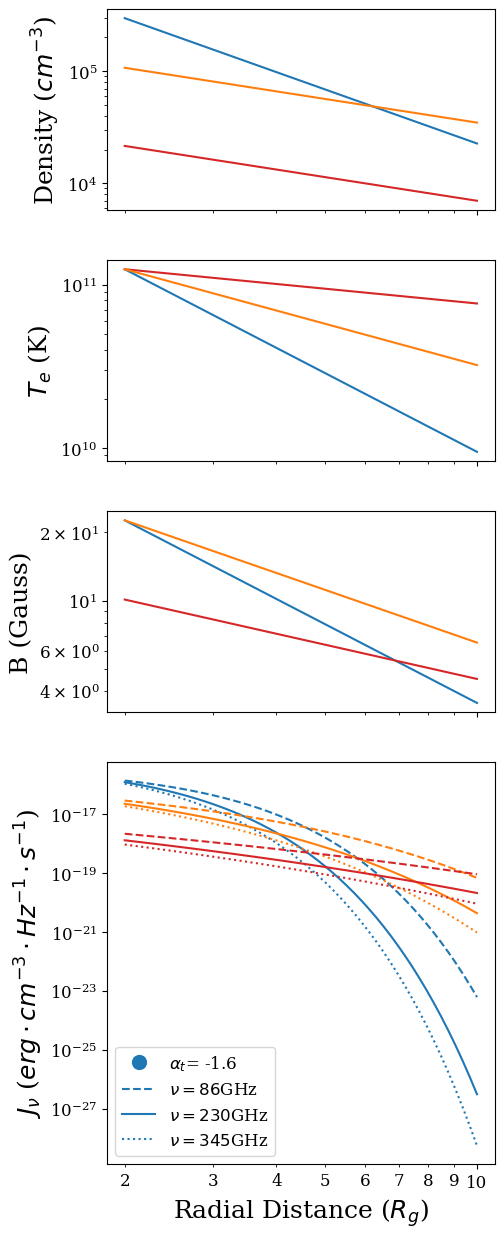

In [21]:
r_array = np.logspace(np.log10(2), np.log10(10)) * u.dimensionless_unscaled
r_array[0].unit
def j_coeff_func(r, redshift, nu0=ilp.kw_nu0,mass=ilp.kw_mass, theta_b=ilp.kw_theta_b, 
            beta=ilp.kw_beta,rb_0=ilp.kw_rb_0,n_th0=ilp.kw_n_th0,t_e0=ilp.kw_t_e0,p_dens=ilp.kw_p_dens,p_temp=ilp.kw_p_temp):
    n = ilp.nth_func(r,mass,rb_0,n_th0,p_dens)
    theta_e = ilp.theta_e_func(r,mass,rb_0,t_e0,p_temp)
    nu_c = ilp.nu_c_func(r,mass,theta_b,rb_0,t_e0,p_temp)
    nu = nu0/redshift
    x = nu / (nu_c)
    # Returns units of [u.erg / (u.cm ** 3 * u.s * u.Hz)]
    return n * ilp.e ** 2 * nu * ilp.synchrotron_func(x) / (2 * np.sqrt(3) * ilp.c * theta_e ** 2)

'''FIGURE 4--------------------------------------------------------------------------------------------------'''

fig = plt.subplots(4,1, sharex='col', figsize=(5,15), height_ratios=[1,1,1,2])

ax = [None, None, None, None]

# Feducial ORange
# 	1.23e4, # n_th0
# 	8.1e9, # t_e0
# 	-.7, # p_dens
# 	-.84 # p_temp

# Steeper Blue
# 	2.9726e+05, # n_th0
# 	-.7, # p_dens
# 	-1.6 # p_temp

# Shallower RED
# 	2.1526e+04, # n_th0
# 	-.7, # p_dens
# 	-.3 # p_temp


# Subplot 1-----------------------------------------
ax[0] = plt.subplot(4,1,1)
ax[0].plot(r_array, ilp.nth_func(r_array, p_dens=-1.6, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue')
ax[0].plot(r_array, ilp.nth_func(r_array, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red')
ax[0].plot(r_array, ilp.nth_func(r_array), 'tab:orange')


ax[0].set_ylabel('Density ({})'.format(R'$cm^{-3}$'), fontsize=18)
ax[0].set_yscale('log')


# Subplot 1-----------------------------------------
ax[1] = plt.subplot(4,1,2)
ax[1].plot(r_array, ilp.te_func(r_array, p_temp=-1.6), 'tab:blue')
ax[1].plot(r_array, ilp.te_func(r_array, p_temp=-.3), 'tab:red')
ax[1].plot(r_array, ilp.te_func(r_array), 'tab:orange')

ax[1].set_ylabel(R'$T_e$ (K)', fontsize=18)
ax[1].set_yscale('log')


# Subplot 1-----------------------------------------
ax[2] = plt.subplot(4,1,3)
ax[2].plot(r_array, ilp.b_func_true(r_array, p_temp=-1.6), 'tab:blue')
ax[2].plot(r_array, ilp.b_func_true(r_array, p_temp=-.3, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red')
ax[2].plot(r_array, ilp.b_func_true(r_array), 'tab:orange')


ax[2].set_yscale('log')
ax[2].set_ylabel('B (Gauss)', fontsize=18)

# Subplot 1-----------------------------------------
ax[3] = plt.subplot(4,1,4)


ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-1.6, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue', label=R"$\alpha_t$= -1.6")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-1.6, nu0 =86e9 * ilp.Hz, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-1.6, nu0=345e9 * ilp.Hz, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue', linestyle=':')

ax[3].plot(r_array, ilp.emission_coeff(r_array,1), 'tab:orange',label="ptemp: -.84")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0 =86e9 * ilp.Hz), 'tab:orange', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0=345e9 * ilp.Hz), 'tab:orange', linestyle=':')

ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', label=R"$\alpha_t$= -.3")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, nu0 =86e9 * ilp.Hz, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, nu0=345e9 * ilp.Hz, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', linestyle=':')


ax[3].set_ylabel(R'$J_\nu$ ($erg \cdot cm^{-3} \cdot Hz^{-1} \cdot s^{-1}$)', fontsize=18)
ax[3].set_yscale('log')
ax[3].set_xscale('log')
ax[3].minorticks_on()
ax[3].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax[3].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
ax[3].set_xlabel('Radial Distance ({})'.format(R'$R_g$'), fontsize=18 )

lines = [
    Line2D([0],[0],marker='o', markerfacecolor='tab:blue', color='w', markersize=12),
    Line2D([0,1],[0,1],linestyle='--', color='tab:blue'), 
    Line2D([0,1],[0,1],linestyle='-', color='tab:blue'), 
    Line2D([0,1],[0,1],linestyle=':', color='tab:blue')
    ]
labels = [
    R"$\alpha_t$= -1.6",
    R'$\nu = 86$GHz',
    R'$\nu = 230$GHz',
    R'$\nu = 345$GHz'
          ]

ax[3].legend(lines,labels)
print(ax[3].get_yaxis())



plt.savefig('./Figures/Figure_4_2.png', bbox_inches='tight')

In [16]:
from matplotlib.lines import Line2D

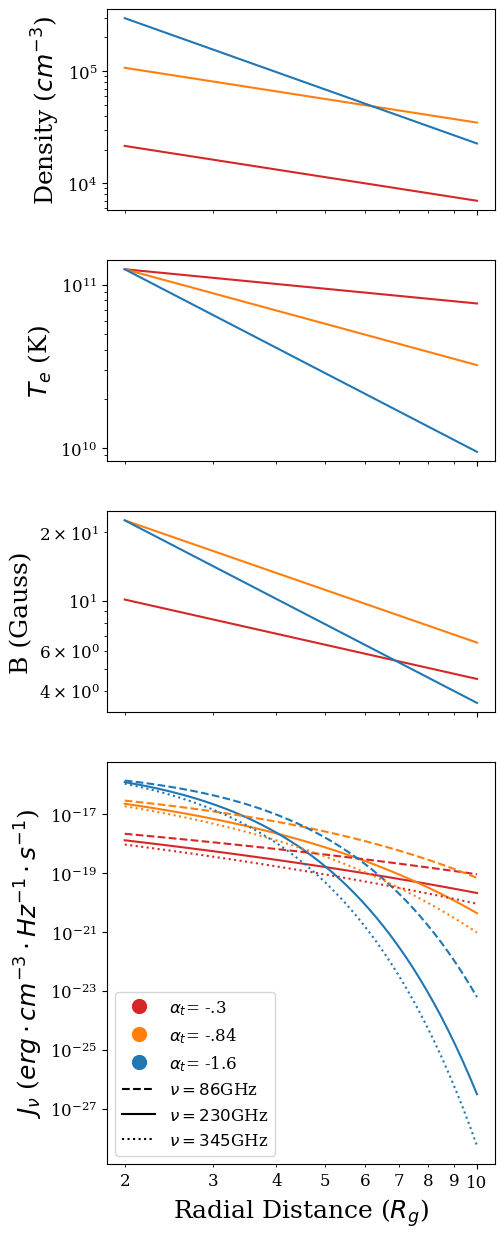

In [12]:
r_array = np.logspace(np.log10(2), np.log10(10)) * u.dimensionless_unscaled
r_array[0].unit
def j_coeff_func(r, redshift, nu0=ilp.kw_nu0,mass=ilp.kw_mass, theta_b=ilp.kw_theta_b, 
            beta=ilp.kw_beta,rb_0=ilp.kw_rb_0,n_th0=ilp.kw_n_th0,t_e0=ilp.kw_t_e0,p_dens=ilp.kw_p_dens,p_temp=ilp.kw_p_temp):
    n = ilp.nth_func(r,mass,rb_0,n_th0,p_dens)
    theta_e = ilp.theta_e_func(r,mass,rb_0,t_e0,p_temp)
    nu_c = ilp.nu_c_func(r,mass,theta_b,rb_0,t_e0,p_temp)
    nu = nu0/redshift
    x = nu / (nu_c)
    # Returns units of [u.erg / (u.cm ** 3 * u.s * u.Hz)]
    return n * ilp.e ** 2 * nu * ilp.synchrotron_func(x) / (2 * np.sqrt(3) * ilp.c * theta_e ** 2)

'''FIGURE 4--------------------------------------------------------------------------------------------------'''

fig = plt.subplots(4,1, sharex='col', figsize=(5,15), height_ratios=[1,1,1,2])

ax = [None, None, None, None]

# Feducial ORange
# 	1.23e4, # n_th0
# 	8.1e9, # t_e0
# 	-.7, # p_dens
# 	-.84 # p_temp

# Steeper Blue
# 	2.9726e+05, # n_th0
# 	-.7, # p_dens
# 	-1.6 # p_temp

# Shallower RED
# 	2.1526e+04, # n_th0
# 	-.7, # p_dens
# 	-.3 # p_temp


# Subplot 1-----------------------------------------
ax[0] = plt.subplot(4,1,1)
ax[0].plot(r_array, ilp.nth_func(r_array, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red')
ax[0].plot(r_array, ilp.nth_func(r_array), 'tab:orange')
ax[0].plot(r_array, ilp.nth_func(r_array, p_dens=-1.6, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue')

ax[0].set_ylabel('Density ({})'.format(R'$cm^{-3}$'), fontsize=18)
ax[0].set_yscale('log')


# Subplot 1-----------------------------------------
ax[1] = plt.subplot(4,1,2)

ax[1].plot(r_array, ilp.te_func(r_array, p_temp=-.3), 'tab:red')
ax[1].plot(r_array, ilp.te_func(r_array), 'tab:orange')
ax[1].plot(r_array, ilp.te_func(r_array, p_temp=-1.6), 'tab:blue')

ax[1].set_ylabel(R'$T_e$ (K)', fontsize=18)
ax[1].set_yscale('log')


# Subplot 1-----------------------------------------
ax[2] = plt.subplot(4,1,3)

ax[2].plot(r_array, ilp.b_func_true(r_array, p_temp=-.3, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red')
ax[2].plot(r_array, ilp.b_func_true(r_array), 'tab:orange')
ax[2].plot(r_array, ilp.b_func_true(r_array, p_temp=-1.6), 'tab:blue')


ax[2].set_yscale('log')
ax[2].set_ylabel('B (Gauss)', fontsize=18)

# Subplot 1-----------------------------------------
ax[3] = plt.subplot(4,1,4)


ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', label=R"$\alpha_t$= -.3")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1), 'tab:orange',label=R"$\alpha_t$= -.84")
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-1.6, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue', label=R"$\alpha_t$= -1.6")


ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, nu0 =86e9 * ilp.Hz, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0 =86e9 * ilp.Hz), 'tab:orange', linestyle='--')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-1.6, nu0 =86e9 * ilp.Hz, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue', linestyle='--')


ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-.3, nu0=345e9 * ilp.Hz, n_th0=2.1526e+04 * ilp.cmcubed), 'tab:red', linestyle=':')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, nu0=345e9 * ilp.Hz), 'tab:orange', linestyle=':')
ax[3].plot(r_array, ilp.emission_coeff(r_array,1, p_temp=-1.6, nu0=345e9 * ilp.Hz, n_th0=2.9726e+05 * ilp.cmcubed), 'tab:blue', linestyle=':')

ax[3].set_ylabel(R'$J_\nu$ ($erg \cdot cm^{-3} \cdot Hz^{-1} \cdot s^{-1}$)', fontsize=18)
ax[3].set_yscale('log')
ax[3].set_xscale('log')
ax[3].minorticks_on()
ax[3].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
ax[3].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
ax[3].set_xlabel('Radial Distance ({})'.format(R'$R_g$'), fontsize=18 )

lines = [
    Line2D([0],[0],marker='o', markerfacecolor='tab:red', color='w', markersize=12),
    Line2D([0],[0],marker='o', markerfacecolor='tab:orange', color='w', markersize=12),
    Line2D([0],[0],marker='o', markerfacecolor='tab:blue', color='w', markersize=12),
    Line2D([0,1],[0,1],linestyle='--', color='k'), 
    Line2D([0,1],[0,1],linestyle='-', color='k'), 
    Line2D([0,1],[0,1],linestyle=':', color='k')
    ]
labels = [
    R"$\alpha_t$= -.3",
    R"$\alpha_t$= -.84",
    R"$\alpha_t$= -1.6",
    R'$\nu = 86$GHz',
    R'$\nu = 230$GHz',
    R'$\nu = 345$GHz'
          ]

ax[3].legend(lines,labels)




plt.savefig('./Figures/Figure_4_3.png', bbox_inches='tight')